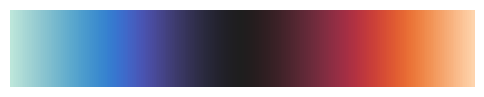

In [46]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import LogFormatter
import numpy as np
from scipy.stats import norm, chi2, uniform

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Get the 'icefire' colormap
cmap = sns.color_palette("icefire", as_cmap=True)

# Create a simple plot to visualize the colormap
fig, ax = plt.subplots(figsize=(6, 1))
gradient = np.linspace(0, 1, 256).reshape(1, -1)
ax.imshow(gradient, aspect='auto', cmap=cmap)
ax.set_axis_off()
plt.show()

# Get a list of colors in the colormap and convert to hex codes
colors = sns.color_palette("icefire", n_colors=10) # Get 10 colors from the colormap
colors_hex = [mcolors.to_hex(color) for color in colors] # Store hex codes in a list called colors_hex

# sns.set_theme(style="white", palette=None)
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

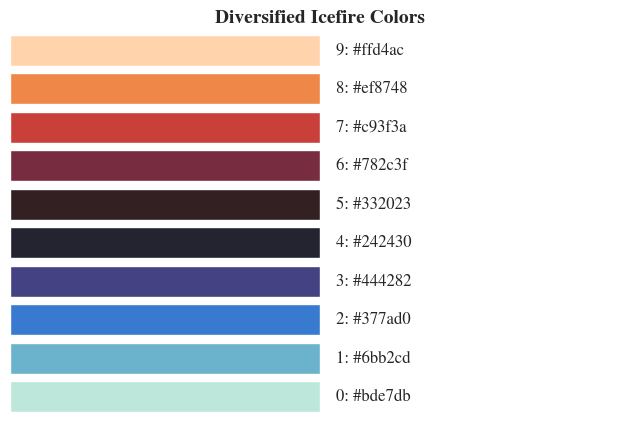

In [47]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

def visualize_color_palette(colors_hex, title="Selected Colors"):
    fig, ax = plt.subplots(figsize=(8, len(colors_hex) * 0.5))
    for i, hex_color in enumerate(colors_hex):
        ax.barh(i, 1, color=hex_color)
        ax.text(1.05, i, f'{i}: {hex_color}', va='center', fontsize=12)
    ax.set_xlim(0, 2)
    ax.set_ylim(-0.5, len(colors_hex) - 0.5)
    ax.axis('off')
    ax.set_title(title, fontsize=14, fontweight='bold')
    # plt.tight_layout()
    plt.show()

# Set style and fonts
sns.set_theme(style="whitegrid", palette=None)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

# Create diverse colors from the full icefire colormap
def get_diverse_icefire_colors(n):
    cmap = sns.color_palette("icefire", as_cmap=True)
    positions = np.linspace(0, 1, n)
    colors = [cmap(pos) for pos in positions]
    return colors, [mcolors.to_hex(c) for c in colors]

colors, colors_hex = get_diverse_icefire_colors(n=10)
visualize_color_palette(colors_hex, title="Diversified Icefire Colors")

# Assign specific colors to the horizontal reference lines
POORLY_CALIBRATED_COLOR = colors_hex[0]
WELL_CALIBRATED_COLOR = colors_hex[9]

# Exclude light ends (0, 9) and dark bands (4, 5)
data_colors_hex = [
    color for i, color in enumerate(colors_hex)
    if i not in [0, 3, 4, 5]
]

In [48]:
data_colors_hex

['#6bb2cd', '#377ad0', '#782c3f', '#c93f3a', '#ef8748', '#ffd4ac']

In [49]:
import numpy as np

# def compute_and_print_auc(label, alpha, mean_ecp):
#     auc = np.trapz(mean_ecp, alpha)
#     print(f"AUC {label}: {auc:.3f}")
#     return auc

# def compute_ECE(label, alpha, mean_ecp):
#     ece = np.mean(np.abs(mean_ecp - alpha))
#     print(f"ECE {label}: {ece:.3f}")
#     return 

In [50]:
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

# Once mounted, you can navigate to the shared drive.
# The path to shared drives typically starts with '/content/drive/SharedWithMe'
# or a similar structure depending on how it was shared and organized.
# You might need to explore the '/content/drive' directory to find the exact path.

# Example: List the contents of the mounted drive
# !ls "/content/drive/"

# Example: List the contents of a potential shared folder (you'll need to replace 'Your Shared Folder Name' with the actual name)
# !ls "/content/drive/Shared drives/Your Shared Folder Name"

In [51]:
# import os

# try:
#     # Start by listing the contents of the main drive directory
#     print(os.listdir('/content/drive/'))
# except FileNotFoundError:
#     print("Error: Google Drive not mounted at /content/drive/")

In [52]:
PATH = '/Users/sammysharief/Downloads/ICLR_2026_Plots/'

In [53]:
np.load(f'{PATH}/GMM_PQMass/shift_neg_6.npz')

NpzFile '/Users/sammysharief/Downloads/ICLR_2026_Plots//GMM_PQMass/shift_neg_6.npz' with keys: zs

In [54]:
def plot_scores_with_error_bars(
    x,
    y,
    yerr,
    L,
    ax, # Now accepting an Axes object
    colors_hex=None,
    xlabel=None,
    ylabel='Mira Score',
    table_number=None,
    xtick_labels=None,
    xtick_rotation=0,
    requested=False,
    LR=False,
    bbox_x=1.02,
    bbox_y=0.72,
    fig_size_x=10,
    fig_size_y=5,
    title=None,
    add_legend=None,
    well_calibrated_color=None,
    poorly_calibrated_color=None,
    lw=5,
    fontsize = 20,
    markersize = 2,
    markeredgewidth= 2,
    elinewidth = 2,
    alpha = 0.5,
    capsize = 10,
    decrease_size = 2,
):

    x_label_font_size = fontsize
    y_label_font_size = fontsize
    tick_label_size = fontsize - decrease_size
    legend_font_size = fontsize - decrease_size

    ax.grid(False)
    if colors_hex is None:
        colors_hex = get_diverse_icefire_colors(10)[1]

    # Main error bar plot with tuned marker size --> iterate over colors_hex for different colors
    for i in range(len(x)):
        ax.errorbar(
            x[i], y[i], yerr=yerr[i], fmt='o',
            capsize=capsize,
            color=colors_hex[i % len(colors_hex)],  # Cycle through your color list
            markersize=markersize,
            alpha=alpha,
            markeredgewidth=markeredgewidth,
            elinewidth=elinewidth
        )
        print(f'Index {i} | Mira: {y[i]} pm {yerr[i]}')
    tick_color = 'black'
    # Horizontal lines (passed in explicitly)

    ax.axhline(1/2, color='gray', linestyle='--', alpha = 1.0, lw=lw, label='Poorly Calibrated')
    # ax.axhline(0.75, color='gray', linestyle='--', alpha = 1.0, lw=lw, label='Poorly Calibrated')
    # Font size tuning
    ax.set_title(title, fontsize=fontsize, fontweight='bold') # Made title bold
    # Move title to the right
    ax.set_xlabel(xlabel, fontsize=x_label_font_size)
    ax.set_ylabel(ylabel, fontsize=y_label_font_size)
    ax.tick_params(axis='x', labelsize=tick_label_size, colors=tick_color) # Correct way to set tick label size
    ax.tick_params(axis='y', labelsize=tick_label_size, colors=tick_color) # Correct way to set tick label size

    # Format y-axis labels to two decimal places
    formatter = mpl.ticker.FormatStrFormatter('%.2f')
    ax.yaxis.set_major_formatter(formatter)

    # Set consistent y-axis limits
    # ax.set_ylim(0.48, 0.8)


    # Custom x-tick labels
    if LR:
        ax.set_xscale('log')  # Log spacing for better visual separation
        ax.set_xticks(ticks=x, labels=xtick_labels, rotation=45, fontsize=tick_label_size) # Corrected
    elif xtick_labels is not None:
        ax.set_xticks(ticks=x) # Corrected
        ax.set_xticklabels(xtick_labels, rotation=xtick_rotation, fontsize=tick_label_size) # Corrected


    if requested:
        ax.set_xlim(-0.3, len(x) - 0.7) # Corrected

    variance = (1/18)/L
    std = np.sqrt(variance)
    print("std:", std)
    ax.axhline(2/3, color='black', linestyle='--', alpha = 1.0, lw=lw, label='Well Calibrated')
    support = np.linspace(x[0]-0.5, x[-1]+0.5, 100)
    ax.fill_between(support, 2/3 - std, 2/3 + std, alpha=0.2, color='black')
    ax.set_xlim(x[0]-0.5, x[-1]+0.5)

In [106]:
def plot_validation_result(
        ax=None,
        legend_font_size=None,
        pqmass_check=False,
        tarp_check=False,
        linear_regression=False,
        tarp_figure_2=False,
        model_misspecification=False,
        prior_and_noise_misspecification=False,
        conditional_distribution=False,
        data_colors_hex=None,
        inverse_bench_black_hole_imaging=False,
        inverse_bench_compressed_sensing_mri=False,
        inverse_bench_linear_inverse_scattering=False,
        lw=2,
        fontsize=40,
        alpha=0.8,
        markeredgewidth=5,
        markersize=18,
        elinewidth = 3,
        capsize=15,
        decrease_size =2
):
    ax.grid(False)
    '''
    Two Options
    1. PQMass --> ONLY for Distribution shift right_axes[1]
    2. TARP   --> ALL others
    '''

    x_label_font_size = fontsize
    y_label_font_size = fontsize
    tick_label_size = fontsize - decrease_size
    legend_font_size = fontsize - decrease_size - 3
    tick_color = 'black'

    if pqmass_check:
        # Load Data
        pqmass_shift_neg6 = np.load(f'{PATH}/GMM_PQMass/shift_neg_6.npz')
        pqmass_shift_neg3 = np.load(f'{PATH}/GMM_PQMass/shift_neg_3.npz')
        pqmass_shift_0 = np.load(f'{PATH}/GMM_PQMass/shift_zero.npz')
        pqmass_shift_3 = np.load(f'{PATH}/GMM_PQMass/shift_pos_3.npz')
        pqmass_shift_6 = np.load(f'{PATH}/GMM_PQMass/shift_pos_6.npz')

        zs_neg6 = pqmass_shift_neg6['zs']
        zs_neg3 = pqmass_shift_neg3['zs']
        zs_0    = pqmass_shift_0['zs']
        zs_3    = pqmass_shift_3['zs']
        zs_6    = pqmass_shift_6['zs']

        # Combine all zs_neg6 into one list
        zs_neg6_combined = np.concatenate(zs_neg6)
        zs_neg3_combined = np.concatenate(zs_neg3)
        zs_0_combined = np.concatenate(zs_0)
        zs_3_combined = np.concatenate(zs_3)
        zs_6_combined = np.concatenate(zs_6)

        if ax is None:
            fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout
        ax.plot(np.linspace(60, 160, 100), chi2.pdf(np.linspace(60, 160, 100), df=99), lw=lw, label = r'$\chi^2_{\mathrm{ideal}}$',   color='red')

        ax.hist(zs_neg6_combined, bins=20, density=True, label = 'Shift: -6', alpha = 0.6, color=data_colors_hex[0], histtype='stepfilled',  linewidth=lw)
        ax.hist(zs_neg3_combined, bins=20, density=True, label = 'Shift: -3', alpha = 0.6, color=data_colors_hex[1], histtype='stepfilled', linewidth=lw)
        ax.hist(zs_0_combined, bins=20, density=True, label = 'Shift: 0', alpha = 0.8, color=data_colors_hex[2], histtype='stepfilled', linewidth=lw)
        ax.hist(zs_3_combined, bins=20, density=True, label = 'Shift: 3', alpha = 0.6, color=data_colors_hex[3], histtype='stepfilled', linewidth=lw)
        ax.hist(zs_6_combined, bins=20, density=True, label = 'Shift: 6', alpha = 0.6, color=data_colors_hex[4], histtype='stepfilled', linewidth=lw)

        ax.set_xlabel(r'$\chi^2_{{\rm PQM}}$', fontsize=x_label_font_size)
        ax.set_ylabel('Frequency', fontsize=y_label_font_size)
        ax.tick_params(axis='both', labelsize=tick_label_size, colors=tick_color)
        ax.legend(
                loc='upper right',
                # bbox_to_anchor=(0.5, 1.15),
                ncol=3,
                # borderaxespad=3,
                fontsize=legend_font_size
            )
    else:
        if linear_regression:
            # Load saved TARP bootstrap data
            lr_data = np.load(f'{PATH}/LR_TARP_Bootstrap_Data/LR_TARP_Bootstrap_Data.npz')
            alpha = lr_data['alpha']
            noise_levels = lr_data['noise_levels']
            ecp_means = lr_data['ecp_means']
            ecp_stds = lr_data['ecp_stds']

            # fig, ax = plt.subplots(figsize=(15, 6))
            if ax is None:
                fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout
            ax.plot([0, 1], [0, 1], 'k--', lw=lw, label='Ideal')

            for i in range(len(noise_levels)):
                label = f"Noise: {noise_levels[i]:.3f}"
                color = data_colors_hex[i % len(data_colors_hex)]
                ax.fill_between(alpha, ecp_means[i] - 1 * ecp_stds[i], ecp_means[i] + 1 * ecp_stds[i], alpha=0.3, color=color)
                ax.plot(alpha, ecp_means[i], lw=lw, label=label, color=color)
                # compute_and_print_auc(label, alpha, ecp_means[i])
                # compute_ECE(label, alpha, ecp_means[i])

            ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
            ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.tick_params(axis='both', labelsize=tick_label_size, colors=tick_color)
            # ax.legend(
            #     bbox_to_anchor=(1.05, 1),
            #     loc='upper left',
            #     borderaxespad=0.,
            #     fontsize=fontsize
            # )
            # plt.tight_layout()
        elif tarp_figure_2:
            biased_pos_case = np.load(f'/Users/sammysharief/Downloads/ICLR_2026_Plots/Tarp_Fig_2_Results/tarp_coverage_biased_tarp_results.npz')
            biased_alpha = biased_pos_case['alpha_bootstrap']
            biased_ecp = biased_pos_case['ecp_bootstrap']
            biased_ecp_mean = biased_ecp.mean(axis=0)
            biased_ecp_std = biased_ecp.std(axis=0)

            overconfident_case = np.load(f'/Users/sammysharief/Downloads/ICLR_2026_Plots/Tarp_Fig_2_Results/tarp_coverage_overconfident_tarp_results.npz')
            overconfident_alpha = overconfident_case['alpha_bootstrap']
            overconfident_ecp = overconfident_case['ecp_bootstrap']
            overconfident_ecp_mean = overconfident_ecp.mean(axis=0)
            overconfident_ecp_std = overconfident_ecp.std(axis=0)

            underconfident_case = np.load(f'/Users/sammysharief/Downloads/ICLR_2026_Plots/Tarp_Fig_2_Results/tarp_coverage_underconfident_tarp_results.npz')
            underconfident_alpha = underconfident_case['alpha_bootstrap']
            underconfident_ecp = underconfident_case['ecp_bootstrap']
            underconfident_ecp_mean = underconfident_ecp.mean(axis=0)
            underconfident_ecp_std = underconfident_ecp.std(axis=0)

            correct_case = np.load(f'/Users/sammysharief/Downloads/ICLR_2026_Plots/Tarp_Fig_2_Results/tarp_coverage_correct_tarp_results.npz')
            correct_alpha = correct_case['alpha_bootstrap']
            correct_ecp = correct_case['ecp_bootstrap']
            correct_ecp_mean = correct_ecp.mean(axis=0)
            correct_ecp_std = correct_ecp.std(axis=0)

            # compute_and_print_auc('Correct', correct_alpha, correct_ecp_mean)
            # compute_and_print_auc('Overconfident', overconfident_alpha, overconfident_ecp_mean)
            # compute_and_print_auc('Underconfident', underconfident_alpha, underconfident_ecp_mean)
            # compute_and_print_auc('Biased', biased_alpha, biased_ecp_mean)

            # compute_ECE('Correct', correct_alpha, correct_ecp_mean)
            # compute_ECE('Overconfident', overconfident_alpha, overconfident_ecp_mean)
            # compute_ECE('Underconfident', underconfident_alpha, underconfident_ecp_mean)
            # compute_ECE('Biased', biased_alpha, biased_ecp_mean)

            if ax is None:
                fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout
            ax.plot([0, 1], [0, 1], 'k--', lw=lw,label='Ideal')
            ax.fill_between(correct_alpha, correct_ecp_mean - 1 * correct_ecp_std, correct_ecp_mean + 1 * correct_ecp_std, alpha=0.2, color=data_colors_hex[0])
            ax.plot(correct_alpha, correct_ecp_mean, lw=lw, label='$p(x)$', color=data_colors_hex[0])

            ax.fill_between(overconfident_alpha, overconfident_ecp_mean - 1 * overconfident_ecp_std, overconfident_ecp_mean + 1 * overconfident_ecp_std, alpha=0.2, color=data_colors_hex[1])
            ax.plot(overconfident_alpha, overconfident_ecp_mean, '.-', lw=lw, label='$q(x)$', color=data_colors_hex[1])

            ax.fill_between(underconfident_alpha, underconfident_ecp_mean - 1 * underconfident_ecp_std, underconfident_ecp_mean + 1 * underconfident_ecp_std, alpha=0.2, color=data_colors_hex[2])
            ax.plot(underconfident_alpha, underconfident_ecp_mean, lw=lw, label='$r(x)$', color=data_colors_hex[2])

            ax.fill_between(biased_alpha, biased_ecp_mean - 1 * biased_ecp_std, biased_ecp_mean + 1 * biased_ecp_std, alpha=0.2, color=data_colors_hex[3])
            ax.plot(biased_alpha, biased_ecp_mean, '--', lw=lw, label='$s(x)$', color=data_colors_hex[3])

            ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
            ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
            ax.tick_params(axis='both', labelsize=tick_label_size, colors=tick_color)
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)       
        elif model_misspecification:
            model_misspecification_data = np.load(f'{PATH}/model_misspecification_tarp_data.npz')
            print(model_misspecification_data.files)
            epl_3sersic_alpha = model_misspecification_data['EPL + 3 sources_alpha']
            epl_3sersic_mean_ecp = model_misspecification_data['EPL + 3 sources_ecp_mean']
            epl_3sersic_std_ecp = model_misspecification_data['EPL + 3 sources_ecp_std']
            epl_1sersic_alpha = model_misspecification_data['EPL + 1 sources_alpha']
            epl_1sersic_mean_ecp = model_misspecification_data['EPL + 1 sources_ecp_mean']
            epl_1sersic_std_ecp = model_misspecification_data['EPL + 1 sources_ecp_std']
            sie_3sersic_alpha = model_misspecification_data['SIE + 3 sources_alpha']
            sie_3sersic_mean_ecp = model_misspecification_data['SIE + 3 sources_ecp_mean']
            sie_3sersic_std_ecp = model_misspecification_data['SIE + 3 sources_ecp_std']
            sie_1sersic_alpha = model_misspecification_data['SIE + 1 sources_alpha']
            sie_1sersic_mean_ecp = model_misspecification_data['SIE + 1 sources_ecp_mean']
            sie_1sersic_std_ecp = model_misspecification_data['SIE + 1 sources_ecp_std']

            if ax is None:
                fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout
            ax.plot([0, 1], [0, 1], 'k--', lw=lw, label='Ideal')

            ax.fill_between(epl_3sersic_alpha, epl_3sersic_mean_ecp - 1 * epl_3sersic_std_ecp, epl_3sersic_mean_ecp + 1 * epl_3sersic_std_ecp, alpha=0.2, color=data_colors_hex[0])
            ax.plot(epl_3sersic_alpha, epl_3sersic_mean_ecp, lw=lw, label='EPL + 3 Sources', color=data_colors_hex[0])

            ax.fill_between(epl_1sersic_alpha, epl_1sersic_mean_ecp - 1 * epl_1sersic_std_ecp, epl_1sersic_mean_ecp + 1 * epl_1sersic_std_ecp, alpha=0.2, color=data_colors_hex[1])
            ax.plot(epl_1sersic_alpha, epl_1sersic_mean_ecp, lw=lw, label='EPL + 1 Source', color=data_colors_hex[1])

            ax.fill_between(sie_3sersic_alpha, sie_3sersic_mean_ecp - 1 * sie_3sersic_std_ecp, sie_3sersic_mean_ecp + 1 * sie_3sersic_std_ecp, alpha=0.2, color=data_colors_hex[2])
            ax.plot(sie_3sersic_alpha, sie_3sersic_mean_ecp, lw=lw, label='SIE + 3 Sources', color=data_colors_hex[2])


            ax.fill_between(sie_1sersic_alpha, sie_1sersic_mean_ecp - 1 * sie_1sersic_std_ecp, sie_1sersic_mean_ecp + 1 * sie_1sersic_std_ecp, alpha=0.2, color=data_colors_hex[3])
            ax.plot(sie_1sersic_alpha, sie_1sersic_mean_ecp, lw=lw, label='SIE + 1 Source', color=data_colors_hex[3])

            ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
            ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.tick_params(axis='both', labelsize=tick_label_size, colors=tick_color)
            
            # compute_and_print_auc('EPL + 3 Sources', epl_3sersic_alpha, epl_3sersic_mean_ecp)
            # compute_and_print_auc('EPL + 1 Source', epl_1sersic_alpha, epl_1sersic_mean_ecp)
            # compute_and_print_auc('SIE + 3 Sources', sie_3sersic_alpha, sie_3sersic_mean_ecp)
            # compute_and_print_auc('SIE + 1 Source', sie_1sersic_alpha, sie_1sersic_mean_ecp) 

            # compute_ECE('EPL + 3 Sources', epl_3sersic_alpha, epl_3sersic_mean_ecp)
            # compute_ECE('EPL + 1 Source', epl_1sersic_alpha, epl_1sersic_mean_ecp)
            # compute_ECE('SIE + 3 Sources', sie_3sersic_alpha, sie_3sersic_mean_ecp)
            # compute_ECE('SIE + 1 Source', sie_1sersic_alpha, sie_1sersic_mean_ecp)       
        elif prior_and_noise_misspecification:
            lensing_data = np.load(f'{PATH}/Lensing_tarp_coverage_data.npz')
            print(lensing_data.files)
            posterior_1_ecp_mean = lensing_data['posterior_1_ecp_mean']
            posterior_1_ecp_std = lensing_data['posterior_1_ecp_std']
            posterior_1_alpha = lensing_data['posterior_1_alpha']
            posterior_2_ecp_mean = lensing_data['posterior_2_ecp_mean']
            posterior_2_ecp_std = lensing_data['posterior_2_ecp_std']
            posterior_2_alpha = lensing_data['posterior_2_alpha']
            posterior_3_ecp_mean = lensing_data['posterior_3_ecp_mean']
            posterior_3_ecp_std = lensing_data['posterior_3_ecp_std']
            posterior_3_alpha = lensing_data['posterior_3_alpha']
            posterior_4_ecp_mean = lensing_data['posterior_4_ecp_mean']
            posterior_4_ecp_std = lensing_data['posterior_4_ecp_std']
            posterior_4_alpha = lensing_data['posterior_4_alpha']

            if ax is None:
                fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout

            ax.plot([0, 1], [0, 1], 'k--', lw=lw,label='Ideal')
            ax.fill_between(posterior_1_alpha, posterior_1_ecp_mean - 1 * posterior_1_ecp_std, posterior_1_ecp_mean + 1 * posterior_1_ecp_std, alpha=0.2, color=data_colors_hex[0])
            ax.plot(posterior_1_alpha, posterior_1_ecp_mean, lw=lw, alpha = 0.5, label='$p_s(x)$, $\sigma_{\eta}=2$', color=data_colors_hex[0])

            ax.fill_between(posterior_2_alpha, posterior_2_ecp_mean - 1 * posterior_2_ecp_std, posterior_2_ecp_mean + 1 * posterior_2_ecp_std, alpha=0.2, color=data_colors_hex[1])
            ax.plot(posterior_2_alpha, posterior_2_ecp_mean, '.-', lw=lw, alpha = 0.5, label='$p_s(x)$, $\sigma_{\eta}=4$', color=data_colors_hex[1])

            ax.fill_between(posterior_3_alpha, posterior_3_ecp_mean - 1 * posterior_3_ecp_std, posterior_3_ecp_mean + 1 * posterior_3_ecp_std, alpha=0.2, color=data_colors_hex[2])
            ax.plot(posterior_3_alpha, posterior_3_ecp_mean, lw=lw, alpha = 0.5, label='$p_m(x)$, $\sigma_{\eta}=2$', color=data_colors_hex[2])

            ax.fill_between(posterior_4_alpha, posterior_4_ecp_mean - 1 * posterior_4_ecp_std, posterior_4_ecp_mean + 1 * posterior_4_ecp_std, alpha=0.2, color=data_colors_hex[3])
            ax.plot(posterior_4_alpha, posterior_4_ecp_mean, '--', lw=lw, alpha = 0.5, label='$p_m(x)$, $\sigma_{\eta}=4$', color=data_colors_hex[3])


            ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
            ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
            ax.tick_params(axis='both', labelsize=tick_label_size, colors=tick_color)
            # compute_and_print_auc('Posterior 1', posterior_1_alpha, posterior_1_ecp_mean)
            # compute_and_print_auc('Posterior 2', posterior_2_alpha, posterior_2_ecp_mean)
            # compute_and_print_auc('Posterior 3', posterior_3_alpha, posterior_3_ecp_mean)
            # compute_and_print_auc('Posterior 4', posterior_4_alpha, posterior_4_ecp_mean)

            # compute_ECE('Posterior 1', posterior_1_alpha, posterior_1_ecp_mean)
            # compute_ECE('Posterior 2', posterior_2_alpha, posterior_2_ecp_mean)
            # compute_ECE('Posterior 3', posterior_3_alpha, posterior_3_ecp_mean)
            # compute_ECE('Posterior 4', posterior_4_alpha, posterior_4_ecp_mean)

        elif conditional_distribution:
            tarp_data = np.load('/Users/sammysharief/Downloads/TARP Plots Conditional Model/Tarp_Result_Averaged_Data.npz')
            methods = ['conditional VAE\n', 'conditional Diffusion Model\n']
            k_sigma = [3]

            # Define common alpha grid (101 points between 0 and 1)
            common_alpha = np.linspace(0, 1, 101)
            common_alpha_ext = np.insert(common_alpha, 0, 0.0)
            cvae_mean_ecp = tarp_data['cvae_mean_ecp']
            cvae_std_ecp = tarp_data['cvae_std_ecp']
            alpha = tarp_data['common_alpha']
            cdm_mean_ecp = tarp_data['cdm_mean_ecp']
            cdm_std_ecp = tarp_data['cdm_std_ecp']

            # Drop the 2nd index
            cdm_mean_ecp[1] = 0.00547937
            cdm_std_ecp[1] = 8.69164966e-05

            # print('Len of cdm_mean_ecp: ', len(cdm_mean_ecp))
            # print(f'Len of cdm_std_ecp: ', len(cdm_std_ecp))

            # print(cdm_mean_ecp)
            # print(cdm_std_ecp)
            # fig, axes = plt.subplots(figsize=(15, 6)
            if ax is None:
                fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout

            cdm_color  = data_colors_hex[0]
            cvae_color = data_colors_hex[1]

            # CDM
            ax.fill_between(common_alpha_ext, cdm_mean_ecp - 3*cdm_std_ecp,
                            cdm_mean_ecp + 3*cdm_std_ecp, alpha=0.2, color=cdm_color)
            ax.plot(common_alpha_ext, cdm_mean_ecp, lw=lw, label='CDM', color=cdm_color)

            # VAE
            ax.fill_between(common_alpha_ext, cvae_mean_ecp - 3*cvae_std_ecp,
                            cvae_mean_ecp + 3*cvae_std_ecp, alpha=0.2, color=cvae_color)
            ax.plot(common_alpha_ext, cvae_mean_ecp, lw=lw, label='CVAE', color=cvae_color)

            ax.plot([0, 1], [0, 1], '--', lw=lw, color='k')

            ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
            ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
            ax.tick_params(axis='both', labelsize=tick_label_size, colors=tick_color)
            ax.set_xlim(0, 1)
            ax.set_ylim(0, 1)
            ax.legend(fontsize=16, loc='upper left')
            # compute_and_print_auc('Conditional DM', common_alpha_ext, cdm_mean_ecp)
            # compute_and_print_auc('Conditional VAE', common_alpha_ext, cvae_mean_ecp)

            # compute_ECE('Conditional DM', common_alpha_ext, cdm_mean_ecp)
            # compute_ECE('Conditional VAE', common_alpha_ext, cvae_mean_ecp)

            # Add these checks before compute_and_print_auc
            # print("Conditional DM data shape:", cdm_mean_ecp.shape)
            # print("Conditional DM data range:", np.min(cdm_mean_ecp), np.max(cdm_mean_ecp))
            # print("Any NaN in cdm_mean_ecp:", np.isnan(cdm_mean_ecp).any())
            # print("Any finite values in cdm_mean_ecp:", np.isfinite(cdm_mean_ecp).any())

        elif inverse_bench_black_hole_imaging:
            bh_tarp_data = np.load(f'{PATH}/InverseBench_Black_Hole_Imaging_Tarp_Data/DAPS_tarp_results.npz')
            # print(bh_tarp_data.files)
            daps_alpha = bh_tarp_data['alpha']
            daps_mean_ecp = bh_tarp_data['ecp_mean']
            daps_std_ecp = bh_tarp_data['ecp_std']

            bh_tarp_diffpir = np.load(f'{PATH}/InverseBench_Black_Hole_Imaging_Tarp_Data/DiffPIR_tarp_results.npz')
            # print(bh_tarp_diffpir.files)
            diffpir_alpha = bh_tarp_diffpir['alpha']
            diffpir_mean_ecp = bh_tarp_diffpir['ecp_mean']
            diffpir_std_ecp = bh_tarp_diffpir['ecp_std']

            bh_tarp_dps = np.load(f'{PATH}/InverseBench_Black_Hole_Imaging_Tarp_Data/DPS_tarp_results.npz')
            # print(bh_tarp_dps.files)
            dps_alpha = bh_tarp_dps['alpha']
            dps_mean_ecp = bh_tarp_dps['ecp_mean']
            dps_std_ecp = bh_tarp_dps['ecp_std']

            bh_tarp_pnpdm = np.load(f'{PATH}/InverseBench_Black_Hole_Imaging_Tarp_Data/PnPDM_tarp_results.npz')
            # print(bh_tarp_pnpdm.files)
            pnpdm_alpha = bh_tarp_pnpdm['alpha']
            pnpdm_mean_ecp = bh_tarp_pnpdm['ecp_mean']
            pnpdm_std_ecp = bh_tarp_pnpdm['ecp_std']

            bh_tarp_reddiff = np.load(f'{PATH}/InverseBench_Black_Hole_Imaging_Tarp_Data/REDDiff_tarp_results.npz')
            # print(bh_tarp_reddiff.files)
            reddiff_alpha = bh_tarp_reddiff['alpha']
            reddiff_mean_ecp = bh_tarp_reddiff['ecp_mean']
            reddiff_std_ecp = bh_tarp_reddiff['ecp_std']

            if ax is None:
                fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout

            ax.plot([0, 1], [0, 1], 'k--', lw=lw,label='Ideal')

            ax.fill_between(daps_alpha, daps_mean_ecp - 1 * daps_std_ecp, daps_mean_ecp + 1 * daps_std_ecp, alpha=0.2, color=data_colors_hex[0])
            ax.plot(daps_alpha, daps_mean_ecp, lw=lw, label='DAPS', color=data_colors_hex[0])

            ax.fill_between(diffpir_alpha, diffpir_mean_ecp - 1 * diffpir_std_ecp, diffpir_mean_ecp + 1 * diffpir_std_ecp, alpha=0.2, color=data_colors_hex[1])
            ax.plot(diffpir_alpha, diffpir_mean_ecp, lw=lw, label='DiffPIR', color=data_colors_hex[1])

            ax.fill_between(dps_alpha, dps_mean_ecp - 1 * dps_std_ecp, dps_mean_ecp + 1 * dps_std_ecp, alpha=0.2, color=data_colors_hex[2])
            ax.plot(dps_alpha, dps_mean_ecp, lw=lw, label='DPS', color=data_colors_hex[2])

            ax.fill_between(pnpdm_alpha, pnpdm_mean_ecp - 1 * pnpdm_std_ecp, pnpdm_mean_ecp + 1 * pnpdm_std_ecp, alpha=0.2, color=data_colors_hex[3])
            ax.plot(pnpdm_alpha, pnpdm_mean_ecp, lw=lw, label='PnPDM', color=data_colors_hex[3])

            ax.fill_between(reddiff_alpha, reddiff_mean_ecp - 1 * reddiff_std_ecp, reddiff_mean_ecp + 1 * reddiff_std_ecp, alpha=0.2, color=data_colors_hex[4])
            ax.plot(reddiff_alpha, reddiff_mean_ecp, lw=lw, label='REDDiff', color=data_colors_hex[4])

            ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
            ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
            ax.set_xlim(0, 1)
            ax.set_ylim(-0.05, 1)
            ax.tick_params(axis='both', labelsize=tick_label_size, colors=tick_color)
            # compute_and_print_auc('DAPS', daps_alpha, daps_mean_ecp)
            # compute_and_print_auc('DiffPIR', diffpir_alpha, diffpir_mean_ecp)
            # compute_and_print_auc('DPS', dps_alpha, dps_mean_ecp)
            # compute_and_print_auc('PnPDM', pnpdm_alpha, pnpdm_mean_ecp)
            # compute_and_print_auc('REDDiff', reddiff_alpha, reddiff_mean_ecp)

            # compute_ECE('DAPS', daps_alpha, daps_mean_ecp)
            # compute_ECE('DiffPIR', diffpir_alpha, diffpir_mean_ecp)
            # compute_ECE('DPS', dps_alpha, dps_mean_ecp)
            # compute_ECE('PnPDM', pnpdm_alpha, pnpdm_mean_ecp)
            # compute_ECE('REDDiff', reddiff_alpha, reddiff_mean_ecp)

        elif inverse_bench_compressed_sensing_mri:
            csmritarp_data = np.load(f'{PATH}/InverseBench_Compressed_Sensing_MRI_Tarp_Data/DAPS_tarp_results.npz')
            daps_alpha = csmritarp_data['alpha']
            daps_mean_ecp = csmritarp_data['ecp_mean']
            daps_std_ecp = csmritarp_data['ecp_std']

            csmritarp_diffpir = np.load(f'{PATH}/InverseBench_Compressed_Sensing_MRI_Tarp_Data/DiffPIR_tarp_results.npz')
            diffpir_alpha = csmritarp_diffpir['alpha']
            diffpir_mean_ecp = csmritarp_diffpir['ecp_mean']
            diffpir_std_ecp = csmritarp_diffpir['ecp_std']

            csmritarp_dps = np.load(f'{PATH}/InverseBench_Compressed_Sensing_MRI_Tarp_Data/DPS_tarp_results.npz')
            dps_alpha = csmritarp_dps['alpha']
            dps_mean_ecp = csmritarp_dps['ecp_mean']
            dps_std_ecp = csmritarp_dps['ecp_std']

            csmritarp_pnpdm = np.load(f'{PATH}/InverseBench_Compressed_Sensing_MRI_Tarp_Data/PnPDM_tarp_results.npz')
            pnpdm_alpha = csmritarp_pnpdm['alpha']
            pnpdm_mean_ecp = csmritarp_pnpdm['ecp_mean']
            pnpdm_std_ecp = csmritarp_pnpdm['ecp_std']

            csmritarp_reddiff = np.load(f'{PATH}/InverseBench_Compressed_Sensing_MRI_Tarp_Data/REDDiff_tarp_results.npz')
            reddiff_alpha = csmritarp_reddiff['alpha']
            reddiff_mean_ecp = csmritarp_reddiff['ecp_mean']
            reddiff_std_ecp = csmritarp_reddiff['ecp_std']

            if ax is None:
                fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout

            ax.plot([0, 1], [0, 1], 'k--', lw=lw,label='Ideal')

            ax.fill_between(daps_alpha, daps_mean_ecp - 1 * daps_std_ecp, daps_mean_ecp + 1 * daps_std_ecp, alpha=0.2, color=data_colors_hex[0])
            ax.plot(daps_alpha, daps_mean_ecp, lw=lw, label='DAPS', color=data_colors_hex[0])

            ax.fill_between(diffpir_alpha, diffpir_mean_ecp - 1 * diffpir_std_ecp, diffpir_mean_ecp + 1 * diffpir_std_ecp, alpha=0.2, color=data_colors_hex[1])
            ax.plot(diffpir_alpha, diffpir_mean_ecp, lw=lw, label='DiffPIR', color=data_colors_hex[1])

            ax.fill_between(dps_alpha, dps_mean_ecp - 1 * dps_std_ecp, dps_mean_ecp + 1 * dps_std_ecp, alpha=0.2, color=data_colors_hex[2])
            ax.plot(dps_alpha, dps_mean_ecp, lw=lw, label='DPS', color=data_colors_hex[2])

            ax.fill_between(pnpdm_alpha, pnpdm_mean_ecp - 1 * pnpdm_std_ecp, pnpdm_mean_ecp + 1 * pnpdm_std_ecp, alpha=0.2, color=data_colors_hex[3])
            ax.plot(pnpdm_alpha, pnpdm_mean_ecp, lw=lw, label='PnPDM', color=data_colors_hex[3])

            ax.fill_between(reddiff_alpha, reddiff_mean_ecp - 1 * reddiff_std_ecp, reddiff_mean_ecp + 1 * reddiff_std_ecp, alpha=0.2, color=data_colors_hex[4])
            ax.plot(reddiff_alpha, reddiff_mean_ecp, lw=lw, label='REDDiff', color=data_colors_hex[4])

            ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
            ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
            ax.set_xlim(0, 1)
            ax.set_ylim(-0.05, 1)
            ax.tick_params(axis='both', labelsize=tick_label_size, colors=tick_color)
            # compute_and_print_auc('DAPS', daps_alpha, daps_mean_ecp)
            # compute_and_print_auc('DiffPIR', diffpir_alpha, diffpir_mean_ecp)
            # compute_and_print_auc('DPS', dps_alpha, dps_mean_ecp)
            # compute_and_print_auc('PnPDM', pnpdm_alpha, pnpdm_mean_ecp)
            # compute_and_print_auc('REDDiff', reddiff_alpha, reddiff_mean_ecp)

            # compute_ECE('DAPS', daps_alpha, daps_mean_ecp)
            # compute_ECE('DiffPIR', diffpir_alpha, diffpir_mean_ecp)
            # compute_ECE('DPS', dps_alpha, dps_mean_ecp)
            # compute_ECE('PnPDM', pnpdm_alpha, pnpdm_mean_ecp)
            # compute_ECE('REDDiff', reddiff_alpha, reddiff_mean_ecp)

        elif inverse_bench_linear_inverse_scattering:
            csmritarp_data = np.load(f'{PATH}/InverseBench_Linear_Inverse_Scattering_Tarp_Data/DAPS_tarp_results.npz')
            daps_alpha = csmritarp_data['alpha']
            daps_mean_ecp = csmritarp_data['ecp_mean']
            daps_std_ecp = csmritarp_data['ecp_std']

            csmritarp_ddrm = np.load(f'{PATH}/InverseBench_Linear_Inverse_Scattering_Tarp_Data/DDRM_tarp_results.npz')
            ddrm_alpha = csmritarp_ddrm['alpha']
            ddrm_mean_ecp = csmritarp_ddrm['ecp_mean']
            ddrm_std_ecp = csmritarp_ddrm['ecp_std']

            csmritarp_ddnm = np.load(f'{PATH}/InverseBench_Linear_Inverse_Scattering_Tarp_Data/DDNM_tarp_results.npz')
            ddnm_alpha = csmritarp_ddnm['alpha']
            ddnm_mean_ecp = csmritarp_ddnm['ecp_mean']
            ddnm_std_ecp = csmritarp_ddnm['ecp_std']

            csmritarp_pigdm = np.load(f'{PATH}/InverseBench_Linear_Inverse_Scattering_Tarp_Data/PIGDM_tarp_results.npz')
            pigdm_alpha = csmritarp_pigdm['alpha']
            pigdm_mean_ecp = csmritarp_pigdm['ecp_mean']
            pigdm_std_ecp = csmritarp_pigdm['ecp_std']

            csmritarp_diffpir = np.load(f'{PATH}/InverseBench_Linear_Inverse_Scattering_Tarp_Data/DiffPIR_tarp_results.npz')
            diffpir_alpha = csmritarp_diffpir['alpha']
            diffpir_mean_ecp = csmritarp_diffpir['ecp_mean']
            diffpir_std_ecp = csmritarp_diffpir['ecp_std']

            csmritarp_dps = np.load(f'{PATH}/InverseBench_Linear_Inverse_Scattering_Tarp_Data/DPS_tarp_results.npz')
            dps_alpha = csmritarp_dps['alpha']
            dps_mean_ecp = csmritarp_dps['ecp_mean']
            dps_std_ecp = csmritarp_dps['ecp_std']

            csmritarp_pnpdm = np.load(f'{PATH}/InverseBench_Linear_Inverse_Scattering_Tarp_Data/PnPDM_tarp_results.npz')
            pnpdm_alpha = csmritarp_pnpdm['alpha']
            pnpdm_mean_ecp = csmritarp_pnpdm['ecp_mean']
            pnpdm_std_ecp = csmritarp_pnpdm['ecp_std']

            csmritarp_reddiff = np.load(f'{PATH}/InverseBench_Linear_Inverse_Scattering_Tarp_Data/REDDiff_tarp_results.npz')
            reddiff_alpha = csmritarp_reddiff['alpha']
            reddiff_mean_ecp = csmritarp_reddiff['ecp_mean']
            reddiff_std_ecp = csmritarp_reddiff['ecp_std']

            if ax is None:
                fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout

            ax.plot([0, 1], [0, 1], 'k--', lw=lw,label='Ideal')

            ax.fill_between(daps_alpha, daps_mean_ecp - 1 * daps_std_ecp, daps_mean_ecp + 1 * daps_std_ecp, alpha=0.2, color=data_colors_hex[0])
            ax.plot(daps_alpha, daps_mean_ecp, lw=lw, label='DAPS', color=data_colors_hex[0])

            ax.fill_between(ddrm_alpha, ddrm_mean_ecp - 1 * ddrm_std_ecp, ddrm_mean_ecp + 1 * ddrm_std_ecp, alpha=0.2, color=data_colors_hex[1])
            ax.plot(ddrm_alpha, ddrm_mean_ecp, lw=lw, label='DDRM', color=data_colors_hex[1])

            ax.fill_between(ddnm_alpha, ddnm_mean_ecp - 1 * ddnm_std_ecp, ddnm_mean_ecp + 1 * ddnm_std_ecp, alpha=0.2, color=data_colors_hex[2])
            ax.plot(ddnm_alpha, ddnm_mean_ecp, lw=lw, label='DDNM', color=data_colors_hex[2])

            ax.fill_between(pigdm_alpha, pigdm_mean_ecp - 1 * pigdm_std_ecp, pigdm_mean_ecp + 1 * pigdm_std_ecp, alpha=0.2, color=data_colors_hex[3])
            ax.plot(pigdm_alpha, pigdm_mean_ecp, lw=lw, label=r'$\pi\text{GDM}$', color=data_colors_hex[3])

            ax.fill_between(diffpir_alpha, diffpir_mean_ecp - 1 * diffpir_std_ecp, diffpir_mean_ecp + 1 * diffpir_std_ecp, alpha=0.2, color=data_colors_hex[1])
            ax.plot(diffpir_alpha, diffpir_mean_ecp, lw=lw, label='DiffPIR', color=data_colors_hex[1])

            ax.fill_between(dps_alpha, dps_mean_ecp - 1 * dps_std_ecp, dps_mean_ecp + 1 * dps_std_ecp, alpha=0.2, color=data_colors_hex[2])
            ax.plot(dps_alpha, dps_mean_ecp, lw=lw, label='DPS', color=data_colors_hex[2])

            ax.fill_between(pnpdm_alpha, pnpdm_mean_ecp - 1 * pnpdm_std_ecp, pnpdm_mean_ecp + 1 * pnpdm_std_ecp, alpha=0.2, color=data_colors_hex[3])
            ax.plot(pnpdm_alpha, pnpdm_mean_ecp, lw=lw, label='PnPDM', color=data_colors_hex[3])

            ax.fill_between(reddiff_alpha, reddiff_mean_ecp - 1 * reddiff_std_ecp, reddiff_mean_ecp + 1 * reddiff_std_ecp, alpha=0.2, color=data_colors_hex[4])
            ax.plot(reddiff_alpha, reddiff_mean_ecp, lw=lw, label='REDDiff', color=data_colors_hex[4])

            ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
            ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
            ax.set_xlim(0, 1)
            ax.set_ylim(-0.05, 1)
            ax.tick_params(axis='both', labelsize=tick_label_size,colors=tick_color)
            # compute_and_print_auc('DAPS', daps_alpha, daps_mean_ecp)
            # compute_and_print_auc('DDRM', daps_alpha, daps_mean_ecp)
            # compute_and_print_auc('DDNM', daps_alpha, daps_mean_ecp)
            # compute_and_print_auc('PIGDM', daps_alpha, daps_mean_ecp)
            # compute_and_print_auc('DiffPIR', diffpir_alpha, diffpir_mean_ecp)
            # compute_and_print_auc('DPS', dps_alpha, dps_mean_ecp)
            # compute_and_print_auc('PnPDM', pnpdm_alpha, pnpdm_mean_ecp)
            # compute_and_print_auc('REDDiff', reddiff_alpha, reddiff_mean_ecp)

            # compute_ECE('DAPS', daps_alpha, daps_mean_ecp)
            # compute_ECE('DDRM', daps_alpha, daps_mean_ecp)
            # compute_ECE('DDNM', daps_alpha, daps_mean_ecp)
            # compute_ECE('PIGDM', daps_alpha, daps_mean_ecp)
            # compute_ECE('DiffPIR', diffpir_alpha, diffpir_mean_ecp)
            # compute_ECE('DPS', dps_alpha, dps_mean_ecp)
            # compute_ECE('PnPDM', pnpdm_alpha, pnpdm_mean_ecp)
            # compute_ECE('REDDiff', reddiff_alpha, reddiff_mean_ecp)

In [56]:
FONTSIZE = 17
LW = 1.5
ALPHA = 0.9
MARKERDGEWIDTH = 1.5
MARKERSIZE = 8
ELINEWIDTH = 2
CAPSIZE = 10
DECREASE_SIZE = 4

In [57]:
# noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]
# scores = [0.6634, 0.6387, 0.5459, 0.5350, 0.5292, 0.5258]
# errors = [0.0026, 0.0011, 0.0016, 0.0011, 0.0015, 0.0018]
# L = 100 # number of fiducials -> to be updt if needed

# fig1, axes1 = plt.subplots(nrows=2,
#     ncols=1,
#     figsize=(6, 6),
#     gridspec_kw={'hspace': 0.1}  # Try values between 0.2 and 0.5
# )
# left_ax1, right_ax1 = axes1

# plot_scores_with_error_bars(
#     x=np.arange(len(noise_levels)),
#     y=scores,
#     L = L,
#     ax=left_ax1,
#     colors_hex=data_colors_hex,
#     yerr=errors,
#     xtick_labels=['0.001', '0.01', '0.1', '0.15', '0.2', '0.25'],
#     xtick_rotation=45,
#     xlabel='Noise Level',
#     ylabel='Mira Score',
#     table_number='Table_1',
#     LR=False,
#     well_calibrated_color=WELL_CALIBRATED_COLOR,
#     poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
#     lw=LW,
#     fontsize=FONTSIZE,
#     alpha=ALPHA,
#     markeredgewidth=MARKERDGEWIDTH,
#     markersize=MARKERSIZE,
#     elinewidth = ELINEWIDTH,
#     capsize=CAPSIZE,
#     decrease_size=DECREASE_SIZE
# )
# plot_validation_result(ax=right_ax1, linear_regression=True, data_colors_hex=data_colors_hex,
#     lw=LW,
#     fontsize=FONTSIZE,
#     alpha=ALPHA,
#     markeredgewidth=MARKERDGEWIDTH,
#     markersize=MARKERSIZE,
#     elinewidth = ELINEWIDTH,
#     capsize=CAPSIZE,
#     decrease_size=DECREASE_SIZE
# )

# fig1.set_constrained_layout(True)
# fig1.savefig('../PDF_Plots/Linear_Regression_Result.pdf')
# fig1.savefig('../PNG_Plots/Linear_Regression_Result.png', dpi=300)

Index 0 | Mira: 0.6655 pm 0.007
Index 1 | Mira: 0.6148 pm 0.0078
Index 2 | Mira: 0.6969 pm 0.0062
Index 3 | Mira: 0.543 pm 0.0082
std: 0.007453559924999299


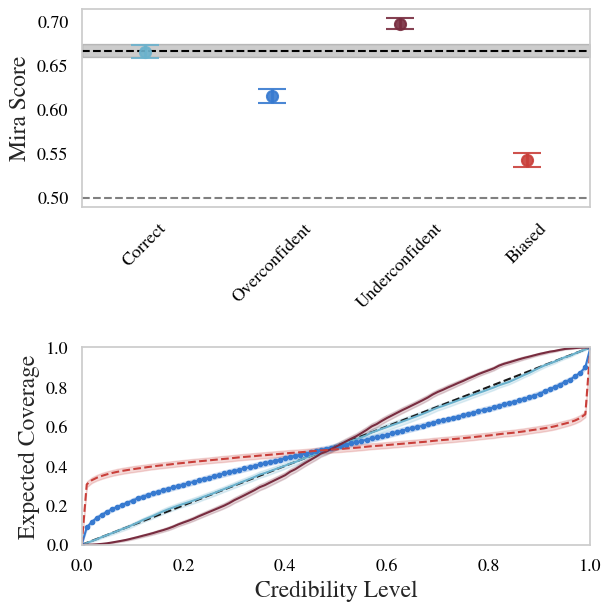

In [58]:
# TARP Figure 2 Mira + Tarp plots

cases = ['Correct', 'Overconfident', 'Underconfident', 'Biased']
scores = [0.6655, 0.6148, 0.6969, 0.5430]
errors = [0.0070, 0.0078, 0.0062, 0.0082]



L = 1000 # number of fiducials -> to be updt if needed

fig1, axes1 = plt.subplots(nrows=2,
    ncols=1,
    figsize=(6, 6),
    gridspec_kw={'hspace': 0.1}  # Try values between 0.2 and 0.5
)
left_ax1, right_ax1 = axes1

plot_scores_with_error_bars(
    x=np.arange(len(cases)),
    y=scores,
    L = L,
    ax=left_ax1,
    colors_hex=data_colors_hex,
    yerr=errors,
    xtick_labels=cases,
    xtick_rotation=45,
    # xlabel='Posteriors',
    ylabel='Mira Score',
    table_number='Table_1',
    LR=False,
    well_calibrated_color=WELL_CALIBRATED_COLOR,
    poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
    lw=LW,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth = ELINEWIDTH,
    capsize=CAPSIZE,
    decrease_size=DECREASE_SIZE
)
plot_validation_result(
    ax=right_ax1, 
    tarp_figure_2=True, 
    data_colors_hex=data_colors_hex,
    lw=LW,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth = ELINEWIDTH,
    capsize=CAPSIZE,
    decrease_size=DECREASE_SIZE
)

fig1.set_constrained_layout(True)
fig1.savefig('../PDF_Plots/Tarp_Fig2_Pokie_Tarp.pdf')
fig1.savefig('../PNG_Plots/Tarp_Fig2_Pokie_Tarp.png', dpi=300)

Index 0 | Mira: 0.5006 pm 0.0137
Index 1 | Mira: 0.5004 pm 0.0141
Index 2 | Mira: 0.6667 pm 0.0102
Index 3 | Mira: 0.5017 pm 0.012
Index 4 | Mira: 0.5013 pm 0.0134
std: 0.010540925533894597


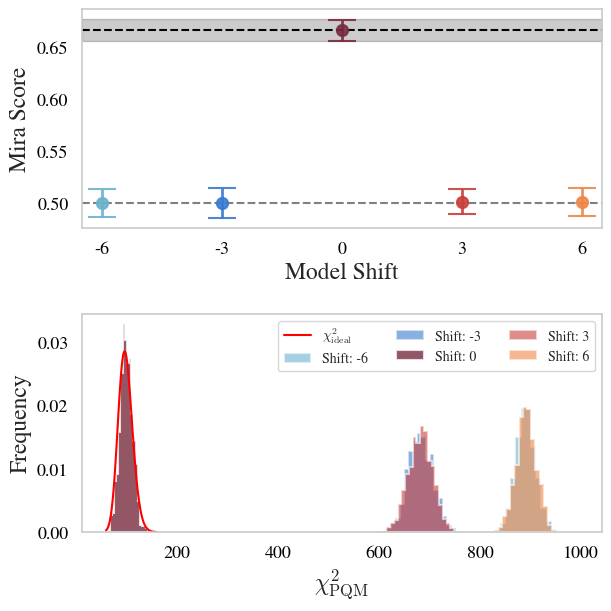

In [59]:
model_shifts = [-6, -3, 0, 3, 6]
scores = [0.5006, 0.5004, 0.6667, 0.5017, 0.5013]
errors = [0.0137, 0.0141, 0.0102, 0.0120, 0.0134]
L = 500 # number of fiducials -> to be updt if needed

fig2, axes2 = plt.subplots(nrows=2,
    ncols=1,
    figsize=(6, 6),
    gridspec_kw={'hspace': 0.1}  # Try values between 0.2 and 0.5
)
left_ax2, right_ax2 = axes2

plot_scores_with_error_bars(
    x=model_shifts,
    y=scores,
    L=L,
    ax=left_ax2,
    yerr=errors,
    xtick_labels=model_shifts,
    xlabel='Model Shift',
    ylabel='Mira Score',
    table_number='Table_GMM',
    bbox_x=1.02,
    bbox_y=0.90,
    # title='Distribution Shift',
    colors_hex=data_colors_hex,
    well_calibrated_color=WELL_CALIBRATED_COLOR,
    poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
    lw=LW,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth = ELINEWIDTH,
    capsize=CAPSIZE,
    decrease_size=DECREASE_SIZE
)
# fig2.suptitle('Distribution Shift', fontsize=60, fontweight='bold', y=1.00)  # adjust `y` as needed
plot_validation_result(
    ax=right_ax2,
    pqmass_check=True,
    data_colors_hex=data_colors_hex,
    lw=LW,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth = ELINEWIDTH,
    capsize=CAPSIZE,
    decrease_size=DECREASE_SIZE
    )

fig2.set_constrained_layout(True)
fig2.savefig('../PDF_Plots/Distribution_Shift_Result.pdf')
fig2.savefig('../PNG_Plots/Distribution_Shift_Result.png', dpi=300)

Index 0 | Mira: 0.6599 pm 0.0248
Index 1 | Mira: 0.5748 pm 0.0276
std: 0.023570226039551584


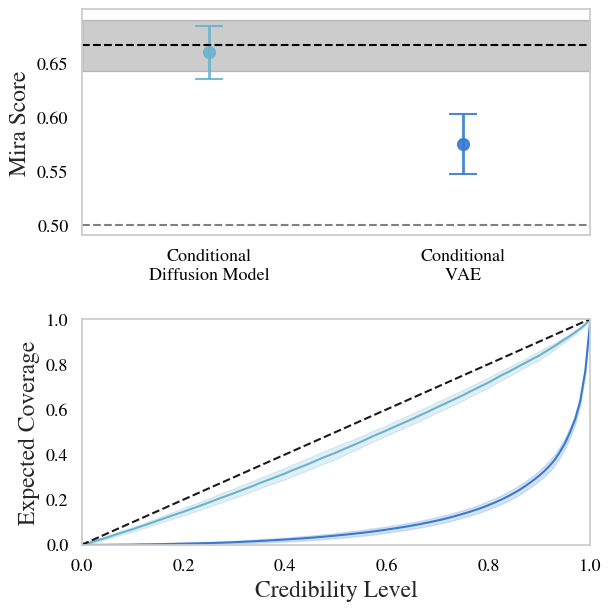

In [60]:
models = ["Conditional\nDiffusion Model", "Conditional\nVAE"]

scores = [0.6599, 0.5748]
errors = [0.0248, 0.0276]

L =100

fig3, axes3 = plt.subplots(nrows=2,
    ncols=1,
    figsize=(6, 6),
    gridspec_kw={'hspace': 0.1}  # Try values between 0.2 and 0.5
)
left_ax3, right_ax3 = axes3

plot_scores_with_error_bars(
    x=range(len(models)),  # Use index for x-axis
    y=scores,
    yerr=errors,
    L=L,
    ax=left_ax3,
    ylabel='Mira Score',
    xtick_labels=models,
    xtick_rotation=0,
    table_number='Table_Cond_Dist',
    requested=True,
    colors_hex=data_colors_hex,
    well_calibrated_color=WELL_CALIBRATED_COLOR,
    poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
    lw=LW,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth = ELINEWIDTH,
    capsize=CAPSIZE,
    decrease_size=DECREASE_SIZE
)
plot_validation_result(
    ax=right_ax3, 
    conditional_distribution=True, 
    data_colors_hex=data_colors_hex,
    lw=LW,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth = ELINEWIDTH,
    capsize=CAPSIZE,decrease_size=DECREASE_SIZE )

fig3.set_constrained_layout(True)
fig3.savefig('../PDF_Plots/Conditional_Distribution_Result.pdf')
fig3.savefig('../PNG_Plots/Conditional_Distribution_Result.png', dpi=300)

Index 0 | Mira: 0.6319946646690369 pm 0.025168711319565773
Index 1 | Mira: 0.5787630081176758 pm 0.02674553170800209
Index 2 | Mira: 0.5393556356430054 pm 0.02755758911371231
Index 3 | Mira: 0.5222544074058533 pm 0.028337465599179268
std: 0.023570226039551584
['EPL + 3 sources_ecp_mean', 'EPL + 3 sources_ecp_std', 'EPL + 3 sources_alpha', 'SIE + 3 sources_ecp_mean', 'SIE + 3 sources_ecp_std', 'SIE + 3 sources_alpha', 'EPL + 1 sources_ecp_mean', 'EPL + 1 sources_ecp_std', 'EPL + 1 sources_alpha', 'SIE + 1 sources_ecp_mean', 'SIE + 1 sources_ecp_std', 'SIE + 1 sources_alpha']


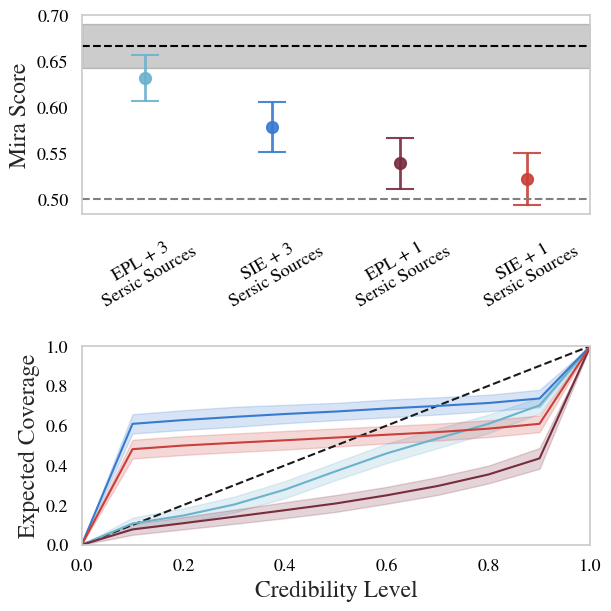

In [61]:
models = [
    "EPL + 3\nSersic Sources",
    "SIE + 3\nSersic Sources",
    "EPL + 1\nSersic Sources",
    "SIE + 1\nSersic Sources"
]
scores = [0.6319946646690369, 0.5787630081176758, 0.5393556356430054, 0.5222544074058533]
errors = [0.025168711319565773, 0.02674553170800209, 0.02755758911371231, 0.028337465599179268]
L = 100

FONTSIZE = 17
LW = 1.5
ALPHA = 0.9
MARKERDGEWIDTH = 1.5
MARKERSIZE = 8
ELINEWIDTH = 2
CAPSIZE = 10
DECREASE_SIZE = 4


fig4, axes4 = plt.subplots(nrows=2,
    ncols=1,
    figsize=(6, 6),
    gridspec_kw={'hspace': 0.1}  # Try values between 0.2 and 0.5
)
left_ax4, right_ax4 = axes4

plot_scores_with_error_bars(
    x=range(len(models)),  # Use index for x-axis
    y=scores,
    L=L,
    yerr=errors,
    ax=left_ax4,
    ylabel='Mira Score',
    xtick_labels=models,
    xtick_rotation=30,
    table_number='Model_Misspecification',
    colors_hex=data_colors_hex,
    well_calibrated_color=WELL_CALIBRATED_COLOR,
    poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
    lw=LW,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth = ELINEWIDTH,
    capsize=CAPSIZE,
    decrease_size=DECREASE_SIZE
    # title='Model Misspecification',
)
# fig4.suptitle('Model Misspecification', fontsize=60, fontweight='bold', y=1.00)  # adjust `y` as needed
plot_validation_result(ax=right_ax4, model_misspecification=True, data_colors_hex=data_colors_hex, lw=LW,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth = ELINEWIDTH,
    capsize=CAPSIZE,decrease_size=DECREASE_SIZE )

fig4.set_constrained_layout(True)
fig4.savefig('../PDF_Plots/Model_Misspecification_Result.pdf')
fig4.savefig('../PNG_Plots/Model_Misspecification_Result.png', dpi=300)

Index 0 | Mira: 0.6442 pm 0.0606
Index 1 | Mira: 0.5783 pm 0.0728
Index 2 | Mira: 0.5298 pm 0.0748
Index 3 | Mira: 0.5056 pm 0.069
std: 0.05892556509887896
['posterior_1_ecp_mean', 'posterior_1_ecp_std', 'posterior_1_alpha', 'posterior_2_ecp_mean', 'posterior_2_ecp_std', 'posterior_2_alpha', 'posterior_3_ecp_mean', 'posterior_3_ecp_std', 'posterior_3_alpha', 'posterior_4_ecp_mean', 'posterior_4_ecp_std', 'posterior_4_alpha']


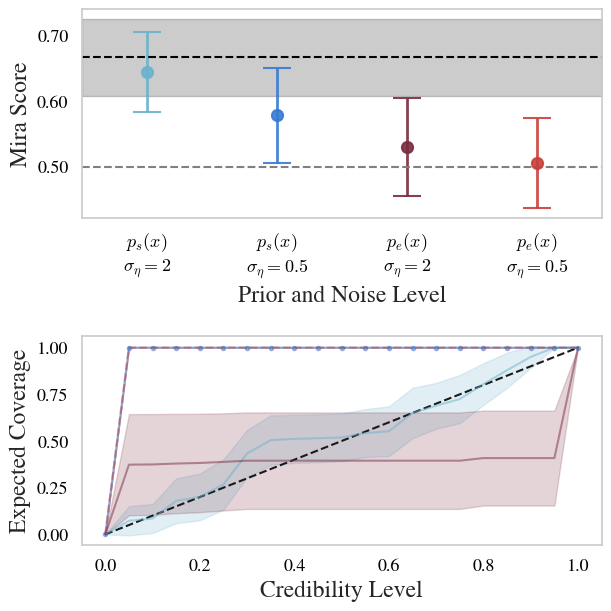

In [62]:
conditions = [
    r"$p_s(x)$" + "\n" + r"$\sigma_{\eta}=2$",
    r"$p_s(x)$" + "\n" + r"$\sigma_{\eta}=0.5$",
    r"$p_e(x)$" + "\n" + r"$\sigma_{\eta}=2$",
    r"$p_e(x)$" + "\n" + r"$\sigma_{\eta}=0.5$"
]
scores = [0.6442, 0.5783, 0.5298, 0.5056]
errors = [0.0606, 0.0728, 0.0748, 0.0690]
L = 16


fig5, axes5 = plt.subplots(nrows=2,
    ncols=1,
    figsize=(6, 6),
    gridspec_kw={'hspace': 0.1}  # Try values between 0.2 and 0.5
)
left_ax5, right_ax5 = axes5

plot_scores_with_error_bars(
    x=range(len(conditions)),  # Use index for x-axis
    y=scores,
    L=L,
    yerr=errors,
    ax=left_ax5,
    xlabel='Prior and Noise Level',
    ylabel='Mira Score',
    xtick_labels=conditions,
    xtick_rotation=0,
    table_number='Table_Lensed_Images',
    bbox_x = 1.02,
    bbox_y = 0.87,
    colors_hex=data_colors_hex,
    well_calibrated_color=WELL_CALIBRATED_COLOR,
    poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
    # title='Prior & Noise Misspecification',
    lw=LW,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth = ELINEWIDTH,
    capsize=CAPSIZE,
    decrease_size=DECREASE_SIZE
)
# fig5.suptitle('Prior & Noise Misspecification', fontsize=60, fontweight='bold', y=1.00)  # adjust `y` as needed
plot_validation_result(ax=right_ax5, prior_and_noise_misspecification=True, data_colors_hex=data_colors_hex,lw=LW,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth = ELINEWIDTH,
    capsize=CAPSIZE,decrease_size=DECREASE_SIZE )

fig5.set_constrained_layout(True)
fig5.savefig('../PDF_Plots/Prior_and_Noise_Misspecification_Result.pdf')
fig5.savefig('../PNG_Plots/Prior_and_Noise_Misspecification_Result.png', dpi=300)

Index 0 | Mira: 0.51140004 pm 0.0294348
Index 1 | Mira: 0.5089394 pm 0.02929415
Index 2 | Mira: 0.51294947 pm 0.03200674
Index 3 | Mira: 0.5096262 pm 0.02528337
Index 4 | Mira: 0.50591314 pm 0.02917956
std: 0.023570226039551584


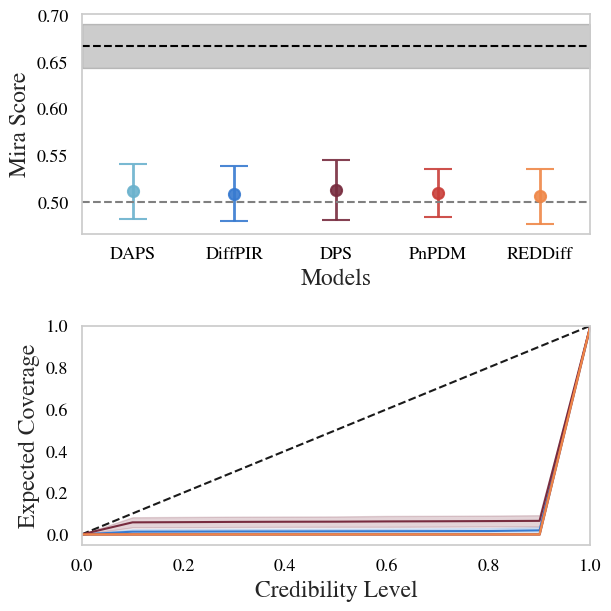

In [63]:
# InverseBench: Black Hole Imaging

models = [
    "DAPS",
    "DiffPIR",
    "DPS",
    "PnPDM",
    "REDDiff"
]

scores = [0.51140004, 0.5089394, 0.51294947, 0.5096262  , 0.50591314 ]
errors = [0.0294348, 0.02929415, 0.03200674, 0.02528337, 0.02917956]
L=100

fig6, axes6 = plt.subplots(nrows=2,
    ncols=1,
    figsize=(6, 6),
    gridspec_kw={'hspace': 0.1}  # Try values between 0.2 and 0.5
)
left_ax6, right_ax6 = axes6

plot_scores_with_error_bars(
    x=range(len(models)),  # Use index for x-axis
    y=scores,
    yerr=errors,
    L=L,
    ax=left_ax6,
    xlabel='Models',
    ylabel='Mira Score',
    xtick_labels=models,
    xtick_rotation=0,
    table_number='Table_IB_Black_Hole_Imaging',
    bbox_x = 1.02,
    bbox_y = 0.87,
    colors_hex=data_colors_hex,
    well_calibrated_color=WELL_CALIBRATED_COLOR,
    poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
    lw=LW,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth = ELINEWIDTH,
    capsize=CAPSIZE,
    decrease_size=DECREASE_SIZE
    # title='Prior & Noise Misspecification',
)
# fig6.suptitle('Prior & Noise Misspecification', fontsize=60, fontweight='bold', y=1.00)  # adjust `y` as needed
plot_validation_result(ax=right_ax6, inverse_bench_black_hole_imaging=True, data_colors_hex=data_colors_hex,lw=LW,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth = ELINEWIDTH,
    capsize=CAPSIZE,decrease_size=DECREASE_SIZE )

fig6.set_constrained_layout(True)
fig6.savefig('../PDF_Plots/InverseBench_BlackHoleImaging.pdf')
fig6.savefig('../PNG_Plots/InverseBench_BlackHoleImaging.png', dpi=300)

Index 0 | Mira: 0.51496667 pm 0.10805649
Index 1 | Mira: 0.5051 pm 0.11640274
Index 2 | Mira: 0.57823336 pm 0.11745473
Index 3 | Mira: 0.5209 pm 0.10246222
Index 4 | Mira: 0.51143336 pm 0.11376356
std: 0.09622504486493763


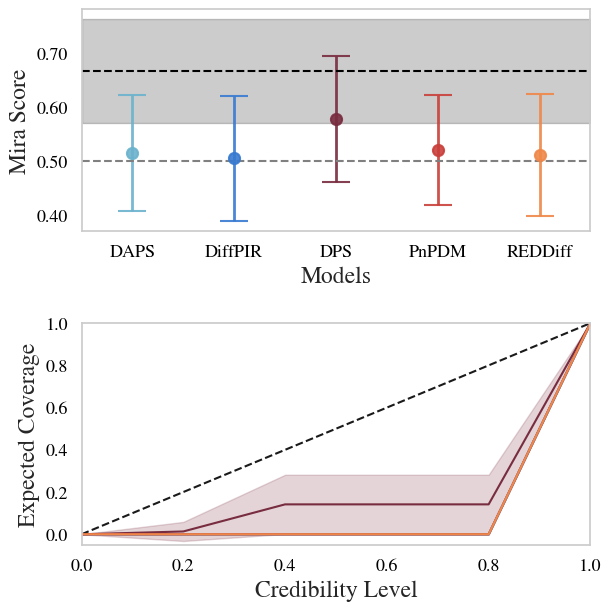

In [64]:
# InverseBench: Compressed Sensing MRI

models = [
    "DAPS",
    "DiffPIR",
    "DPS",
    "PnPDM",
    "REDDiff"
]
scores = [0.51496667, 0.5051, 0.57823336, 0.5209, 0.51143336]
errors = [0.10805649, 0.11640274, 0.11745473, 0.10246222, 0.11376356]

L=6

fig6, axes6 = plt.subplots(nrows=2,
    ncols=1,
    figsize=(6, 6),
    gridspec_kw={'hspace': 0.1}  # Try values between 0.2 and 0.5
)
left_ax6, right_ax6 = axes6

plot_scores_with_error_bars(
    x=range(len(models)),  # Use index for x-axis
    y=scores,
    yerr=errors,
    L=L,
    ax=left_ax6,
    xlabel='Models',
    ylabel='Mira Score',
    xtick_labels=models,
    xtick_rotation=0,
    table_number='Table_IB_Black_Hole_Imaging',
    bbox_x = 1.02,
    bbox_y = 0.87,
    colors_hex=data_colors_hex,
    well_calibrated_color=WELL_CALIBRATED_COLOR,
    poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
    lw=LW,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth = ELINEWIDTH,
    capsize=CAPSIZE,
    decrease_size=DECREASE_SIZE
    # title='Prior & Noise Misspecification',
)
# fig6.suptitle('Prior & Noise Misspecification', fontsize=60, fontweight='bold', y=1.00)  # adjust `y` as needed
plot_validation_result(ax=right_ax6, inverse_bench_compressed_sensing_mri=True, data_colors_hex=data_colors_hex,lw=LW,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth = ELINEWIDTH,
    capsize=CAPSIZE,decrease_size=DECREASE_SIZE )

fig6.set_constrained_layout(True)
fig6.savefig('../PDF_Plots/InverseBench_CompressedSensingMRI.pdf')
fig6.savefig('../PNG_Plots/InverseBench_CompressedSensingMRI.png', dpi=300)

In [65]:
# # InverseBench: Linear Inverse Scattering
# models = ["DPS", "REDDiff", "DiffPIR", "PnPDM", "DAPS", "DDRM", "DDNM", "PiGDM"]

# scores = [0.5118748, 0.5107434, 0.50680405, 0.50886065, 0.5079172, 0.51027876, 0.50967073, 0.515402]
# errors = [0.0030, 0.0029, 0.0028, 0.0029, 0.0035, 0.0024, 0.0033, 0.0028]
# L =100

# fig7, axes7 = plt.subplots(nrows=2,
#     ncols=1,
#     figsize=(6, 6),
#     gridspec_kw={'hspace': 0.1}  # Try values between 0.2 and 0.5
# )
# left_ax7, right_ax7 = axes7

# plot_scores_with_error_bars(
#     x=range(len(models)),  # Use index for x-axis
#     y=scores,
#     yerr=errors,
#     L=L,
#     ax=left_ax7,
#     xlabel='Models',
#     ylabel='Mira Score',
#     xtick_labels=models,
#     xtick_rotation=45,
#     table_number='Table_IB_Black_Hole_Imaging',
#     bbox_x = 1.02,
#     bbox_y = 0.87,
#     colors_hex=data_colors_hex,
#     well_calibrated_color=WELL_CALIBRATED_COLOR,
#     poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
#     lw=LW,
#     fontsize=FONTSIZE,
#     alpha=ALPHA,
#     markeredgewidth=MARKERDGEWIDTH,
#     markersize=MARKERSIZE,
#     elinewidth = ELINEWIDTH,
#     capsize=CAPSIZE,
#     decrease_size=DECREASE_SIZE
#     # title='Prior & Noise Misspecification',
# )
# # fig7.suptitle('Prior & Noise Misspecification', fontsize=60, fontweight='bold', y=1.00)  # adjust `y` as needed
# plot_validation_result(ax=right_ax7, inverse_bench_linear_inverse_scattering=True, data_colors_hex=data_colors_hex,lw=LW,
#     fontsize=FONTSIZE,
#     alpha=ALPHA,
#     markeredgewidth=MARKERDGEWIDTH,
#     markersize=MARKERSIZE,
#     elinewidth = ELINEWIDTH,
#     capsize=CAPSIZE,decrease_size=DECREASE_SIZE )

# fig7.set_constrained_layout(True)
# fig7.savefig('./PDF_Plots/InverseBench_LIS.pdf')
# fig7.savefig('./PNG_Plots/InverseBench_LIS.png', dpi=300)

In [66]:
def plot_mira_alone(
    x,
    y,
    yerr,
    L,
    ax, # Now accepting an Axes object
    model_name=None,
    colors_hex=None,
    xlabel=None,
    ylabel='Mira Score',
    table_number=None,
    xtick_labels=None,
    xtick_rotation=0,
    requested=False,
    LR=False,
    bbox_x=1.02,
    bbox_y=0.72,
    fig_size_x=10,
    fig_size_y=5,
    title=None,
    legend_fontsize=15,
    lw=5,
    fontsize = 20,
    markersize = 2,
    markeredgewidth= 2,
    elinewidth = 2,
    alpha = 0.5,
    capsize = 10,
    decrease_size = 2,
    draw_fill=True
):
    x_label_font_size = fontsize
    y_label_font_size = fontsize
    tick_label_size = fontsize - decrease_size
    legend_font_size = fontsize - decrease_size
    
    ax.grid(False)
    if colors_hex is None:
        colors_hex = get_diverse_icefire_colors(10)[1]

    # Main error bar plot with tuned marker size --> iterate over colors_hex for different colors
    for i in range(len(x)):
        ax.errorbar(
            x[i], y[i], yerr=yerr[i], fmt='o',
            capsize=capsize,
            color=colors_hex[i % len(colors_hex)],  # Cycle through your color list
            markersize=markersize,
            alpha=1.0,
            markeredgewidth=markeredgewidth,
            elinewidth=elinewidth,
            label=model_name
        )
    # Add legend if specified
    # ax.legend(loc='upper right', bbox_to_anchor=(bbox_x, bbox_y), fontsize=15, frameon=False)
    # Horizontal lines (passed in explicitly)
    ax.axhline(1/2, color='gray', linestyle='--', alpha = 1.0, lw=1.5, label='Poorly Calibrated')
    # ax.axhline((1/2 + 1/np.sqrt(12)), color='gray', linestyle='--', alpha = 1.0, lw=1.5, label='Underconfident')


    # Font size tuning
    ax.set_title(title, fontsize=25, fontweight='bold') # Made title bold
    # Move title to the right
    ax.set_xlabel(xlabel, fontsize=x_label_font_size)
    ax.set_ylabel(ylabel, fontsize=y_label_font_size)
    tick_color = 'black'
    ax.tick_params(axis='x', labelsize=tick_label_size, colors=tick_color)
    ax.tick_params(axis='y', labelsize=tick_label_size, colors=tick_color)

    # Format y-axis labels to two decimal places
    formatter = mpl.ticker.FormatStrFormatter('%.2f')
    ax.yaxis.set_major_formatter(formatter)

    # Set consistent y-axis limits
    # ax.set_ylim(0.48, 0.68)


    # Custom x-tick labels
    if LR:
        ax.set_xscale('log')  # Log spacing for better visual separation
        ax.set_xticks(ticks=x, labels=xtick_labels, rotation=45, fontsize=tick_label_size) # Corrected
    elif xtick_labels is not None:
        ax.set_xticks(ticks=x) # Corrected
        ax.set_xticklabels(xtick_labels, rotation=xtick_rotation, fontsize=tick_label_size) # Corrected


    if requested:
        ax.set_xlim(-0.3, len(x) - 0.7) # Corrected

    # Collect handles & labels
    handles, labels = ax.get_legend_handles_labels()

    # Deduplicate so calibration lines don’t repeat
    from collections import OrderedDict
    by_label = OrderedDict(zip(labels, handles))

    # Add legend once
    # Drop the first two entries (calibration lines) if they exist
    if 'Well Calibrated' in by_label:
        by_label.pop('Well Calibrated')
    if 'Poorly Calibrated' in by_label:
        by_label.pop('Poorly Calibrated')
    if 'Underconfident' in by_label:
        by_label.pop('Underconfident')
    ax.legend(
        by_label.values(), 
        by_label.keys(), 
        fontsize=legend_fontsize, 
        loc="upper right"
    )
    if draw_fill:
        variance = (1/18)/L
        std = np.sqrt(variance)
        print("std:", std)
        ax.axhline(2/3, color='black', linestyle='--', alpha = 1.0, lw=lw, label='Well Calibrated')
        support = np.linspace(x[0]-0.5, x[-1]+0.5, 100)
        ax.fill_between(support, 2/3 - std, 2/3 + std, alpha=0.2, color='black')
        ax.set_xlim(x[0]-0.5, x[-1]+0.5)
        # ax.fill_between(support, 2/3 - std, 2/3 + std, alpha=0.2, color='black')

In [67]:
FONTSIZE = 22
LW = 1.5
ALPHA = 0.9
MARKERDGEWIDTH = 1.5
MARKERSIZE = 10
ELINEWIDTH = 2
CAPSIZE = 10
DECREASE_SIZE = 1

Plotting: LR=10 with scores: [0.6655, 0.6125, 0.5652, 0.5634, 0.5676, 0.5545] and errors: [0.0828, 0.0779, 0.0823, 0.0889, 0.0814, 0.0971]
std: 0.007453559924999299
Plotting: LR=50 with scores: [0.671, 0.6421, 0.5731, 0.5623, 0.5554, 0.5499] and errors: [0.0362, 0.041, 0.0376, 0.0366, 0.0393, 0.0442]
Plotting: LR=100 with scores: [0.6652, 0.638, 0.5683, 0.562, 0.5572, 0.5493] and errors: [0.0226, 0.0257, 0.0277, 0.0282, 0.0296, 0.0292]
Plotting: LR=500 with scores: [0.665, 0.6414, 0.5677, 0.5595, 0.5532, 0.553] and errors: [0.012, 0.0114, 0.0129, 0.0118, 0.013, 0.0136]
Plotting: LR=1000 with scores: [0.6665, 0.6427, 0.5671, 0.5581, 0.5542, 0.5527] and errors: [0.0075, 0.0082, 0.0091, 0.0105, 0.009, 0.0087]


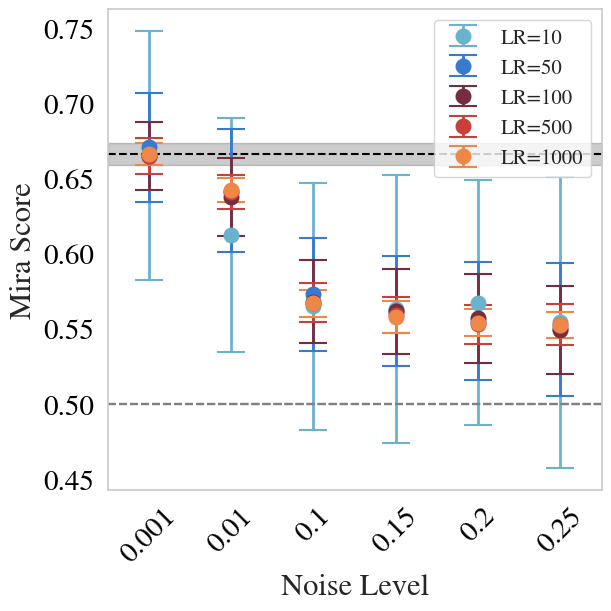

In [68]:
# Sensitivity Mira Result

lr_10_posteriors = (
    [0.6655, 0.6125, 0.5652, 0.5634, 0.5676, 0.5545],
    [0.0828, 0.0779, 0.0823, 0.0889, 0.0814, 0.0971]
)

lr_50_posteriors = (
    [0.6710, 0.6421, 0.5731, 0.5623, 0.5554, 0.5499],
    [0.0362, 0.0410, 0.0376, 0.0366, 0.0393, 0.0442]
)

lr_100_posteriors = (
    [0.6652, 0.6380, 0.5683, 0.5620, 0.5572, 0.5493],
    [0.0226, 0.0257, 0.0277, 0.0282, 0.0296, 0.0292]
)

lr_500_posteriors = (
    [0.6650, 0.6414, 0.5677, 0.5595, 0.5532, 0.5530],
    [0.0120, 0.0114, 0.0129, 0.0118, 0.0130, 0.0136]
)

lr_1000_posteriors = (
    [0.6665, 0.6427, 0.5671, 0.5581, 0.5542, 0.5527],
    [0.0075, 0.0082, 0.0091, 0.0105, 0.0090, 0.0087]
)

# lr_5000_posteriors = (
#     [0.6643, 0.6409, 0.5670, 0.5590, 0.5549, 0.5519],
#     [0.0016, 0.0021, 0.0010, 0.0010, 0.0012, 0.0009]
# )

noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]

posteriors = {
    "LR=10": lr_10_posteriors,
    "LR=50": lr_50_posteriors,
    "LR=100": lr_100_posteriors,
    "LR=500": lr_500_posteriors,
    "LR=1000": lr_1000_posteriors,
    # "LR=5000": lr_5000_posteriors
}

# Make one figure
fig, ax = plt.subplots(figsize=(6, 6))

# Call your function for each metric
for i, (num_fiducials, (scores, errors)) in enumerate(posteriors.items()):
    print(f"Plotting: {num_fiducials} with scores: {scores} and errors: {errors}")
    plot_mira_alone(
        x=np.arange(len(noise_levels)),
        y=scores,
        yerr=errors,
        ax=ax,  # same axis each time
        colors_hex=[data_colors_hex[i % len(data_colors_hex)]],  # pick 1 color
        xtick_labels=[str(nl) for nl in noise_levels],
        xtick_rotation=45,
        xlabel="Noise Level",
        ylabel="Mira Score",
        table_number=f"Table_{i+1}",
        model_name=num_fiducials,
        draw_fill=(i == 0),
        lw=LW,
        L=1000,
        fontsize=FONTSIZE,
        alpha=ALPHA,
        markeredgewidth=MARKERDGEWIDTH,
        markersize=MARKERSIZE,
        elinewidth=ELINEWIDTH,
        capsize=CAPSIZE,
        decrease_size=DECREASE_SIZE
    )


fig.set_constrained_layout(True)
fig.savefig("../PDF_Plots/LR_Sensitivity_Pokie_Result.pdf")
fig.savefig("../PNG_Plots/LR_Sensitivity_Pokie_Result.png", dpi=300)
plt.show()

Plotting metric: L2 with scores: [0.6642, 0.6417, 0.5658, 0.5577, 0.5535, 0.5506] and errors: [0.0038, 0.0034, 0.0042, 0.0048, 0.004, 0.0042]
std: 0.003333333333333333
Plotting metric: L1 with scores: [0.6633, 0.6417, 0.5768, 0.5689, 0.5626, 0.5589] and errors: [0.0033, 0.0036, 0.0038, 0.0043, 0.0039, 0.0043]
Plotting metric: Chebyshev with scores: [0.6635, 0.6426, 0.5624, 0.5525, 0.5485, 0.5464] and errors: [0.0036, 0.0039, 0.0038, 0.0039, 0.0041, 0.0042]
Plotting metric: Cosine with scores: [0.6609, 0.6476, 0.6086, 0.5987, 0.5918, 0.5858] and errors: [0.0038, 0.0034, 0.0034, 0.004, 0.0036, 0.0036]
Plotting metric: Minkowski with scores: [0.6634, 0.6399, 0.5628, 0.5534, 0.5495, 0.5476] and errors: [0.004, 0.0036, 0.0038, 0.0044, 0.0039, 0.0039]


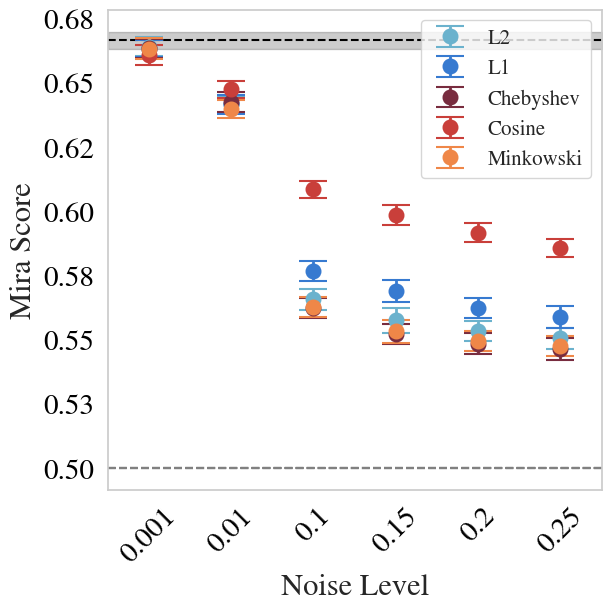

In [69]:
# Distance Mira Result
noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]

metrics = {
    "L2": (
        [0.6642, 0.6417, 0.5658, 0.5577, 0.5535, 0.5506],
        [0.0038, 0.0034, 0.0042, 0.0048, 0.0040, 0.0042]
    ),
    "L1": (
        [0.6633, 0.6417, 0.5768, 0.5689, 0.5626, 0.5589],
        [0.0033, 0.0036, 0.0038, 0.0043, 0.0039, 0.0043]
    ),
    "Chebyshev": (
        [0.6635, 0.6426, 0.5624, 0.5525, 0.5485, 0.5464],
        [0.0036, 0.0039, 0.0038, 0.0039, 0.0041, 0.0042]
    ),
    "Cosine": (
        [0.6609, 0.6476, 0.6086, 0.5987, 0.5918, 0.5858],
        [0.0038, 0.0034, 0.0034, 0.0040, 0.0036, 0.0036]
    ),
    "Minkowski": (
        [0.6634, 0.6399, 0.5628, 0.5534, 0.5495, 0.5476],
        [0.0040, 0.0036, 0.0038, 0.0044, 0.0039, 0.0039]
    )
}

# Make one figure
fig, ax = plt.subplots(figsize=(6, 6))

# Call your function for each metric
for i, (metric_name, (scores, errors)) in enumerate(metrics.items()):
    print(f"Plotting metric: {metric_name} with scores: {scores} and errors: {errors}")
    plot_mira_alone(
        x=np.arange(len(noise_levels)),
        y=scores,
        yerr=errors,
        ax=ax,  # same axis each time
        colors_hex=[data_colors_hex[i % len(data_colors_hex)]],  # pick 1 color
        xtick_labels=[str(nl) for nl in noise_levels],
        xtick_rotation=45,
        draw_fill=(i == 0),
        xlabel="Noise Level",
        ylabel="Mira Score",
        table_number=f"Table_{i+1}",
        model_name=metric_name,  # Pass metric name for legend
        lw=LW,
        L=5000,
        fontsize=FONTSIZE,
        alpha=ALPHA,
        markeredgewidth=MARKERDGEWIDTH,
        markersize=MARKERSIZE,
        elinewidth=ELINEWIDTH,
        capsize=CAPSIZE,
        decrease_size=DECREASE_SIZE
    )


fig.set_constrained_layout(True)
fig.savefig("../PDF_Plots/Distance_Pokie_Result.pdf")
fig.savefig("../PNG_Plots/Distance_Pokie_Result.png", dpi=300)
plt.show()

Plotting distribution: Uniform with scores: [0.6638, 0.6397, 0.5652, 0.5578, 0.5526, 0.5496] and errors: [0.0028, 0.0034, 0.0039, 0.0037, 0.0038, 0.0041]
std: 0.003333333333333333
Plotting distribution: Normal with scores: [0.6633, 0.6395, 0.5525, 0.5405, 0.5348, 0.5301] and errors: [0.0034, 0.0034, 0.004, 0.004, 0.004, 0.0045]
Plotting distribution: Beta(2,5) with scores: [0.6646, 0.6444, 0.5546, 0.5396, 0.5282, 0.5234] and errors: [0.0034, 0.0037, 0.0041, 0.0038, 0.0039, 0.0044]


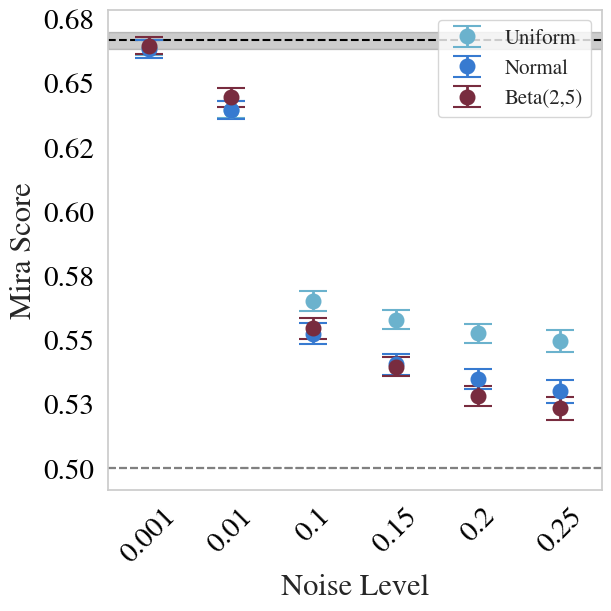

In [70]:
# Distribution Mira Result
# Table Distribution_Choice
noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]

# Scores and 68% CI errors for each center distribution
distributions = {
    "Uniform": (
        [0.6638, 0.6397, 0.5652, 0.5578, 0.5526, 0.5496],
        [0.0028, 0.0034, 0.0039, 0.0037, 0.0038, 0.0041]
    ),
    "Normal": (
        [0.6633, 0.6395, 0.5525, 0.5405, 0.5348, 0.5301],
        [0.0034, 0.0034, 0.0040, 0.0040, 0.0040, 0.0045]
    ),
    "Beta(2,5)": (
        [0.6646, 0.6444, 0.5546, 0.5396, 0.5282, 0.5234],
        [0.0034, 0.0037, 0.0041, 0.0038, 0.0039, 0.0044]
    )
}

# Make one figure
fig, ax = plt.subplots(figsize=(6, 6))

# Call your function for each distribution
for i, (distribution_name, (scores, errors)) in enumerate(distributions.items()):
    print(f"Plotting distribution: {distribution_name} with scores: {scores} and errors: {errors}")
    plot_mira_alone(
        x=np.arange(len(noise_levels)),
        y=scores,
        yerr=errors,
        ax=ax,  # same axis each time
        colors_hex=[data_colors_hex[i % len(data_colors_hex)]],  # pick 1 color
        xtick_labels=[str(nl) for nl in noise_levels],
        xtick_rotation=45,
        xlabel="Noise Level",
        ylabel="Mira Score",
        table_number=f"Table_{i+1}",
        draw_fill=(i == 0),
        model_name=distribution_name,  # Pass distribution name for legend
        lw=LW,
        L=5000,
        fontsize=FONTSIZE,
        alpha=ALPHA,
        markeredgewidth=MARKERDGEWIDTH,
        markersize=MARKERSIZE,
        elinewidth=ELINEWIDTH,
        capsize=CAPSIZE,
        decrease_size=DECREASE_SIZE
    )


fig.set_constrained_layout(True)
fig.savefig("../PDF_Plots/Center_Distribution_Pokie_Result.pdf")
fig.savefig("../PNG_Plots/Center_Distribution_Pokie_Result.png", dpi=300)
plt.show()

Plotting shape size: (1.0, 2.0) with scores: [0.6669, 0.652, 0.5801, 0.5652, 0.5566, 0.5492] and errors: [0.0038, 0.0051, 0.0055, 0.0051, 0.0045, 0.0057]
std: 0.004303314829119352
Plotting shape size: (0.5, 1.5) with scores: [0.6656, 0.655, 0.5834, 0.565, 0.5527, 0.5442] and errors: [0.0044, 0.004, 0.0044, 0.0045, 0.0049, 0.0051]
Plotting shape size: (1.5, 1.0) with scores: [0.6629, 0.6376, 0.5521, 0.5416, 0.5374, 0.5351] and errors: [0.0048, 0.0051, 0.005, 0.0058, 0.0056, 0.0044]
Plotting shape size: (2.0, 0.5) with scores: [0.6627, 0.6332, 0.5354, 0.5276, 0.5258, 0.5239] and errors: [0.0044, 0.0051, 0.0053, 0.0055, 0.0054, 0.0058]
Plotting shape size: (0.8, 1.2) with scores: [0.6655, 0.6481, 0.5766, 0.5654, 0.5595, 0.5545] and errors: [0.0046, 0.0041, 0.0048, 0.0051, 0.0047, 0.0042]


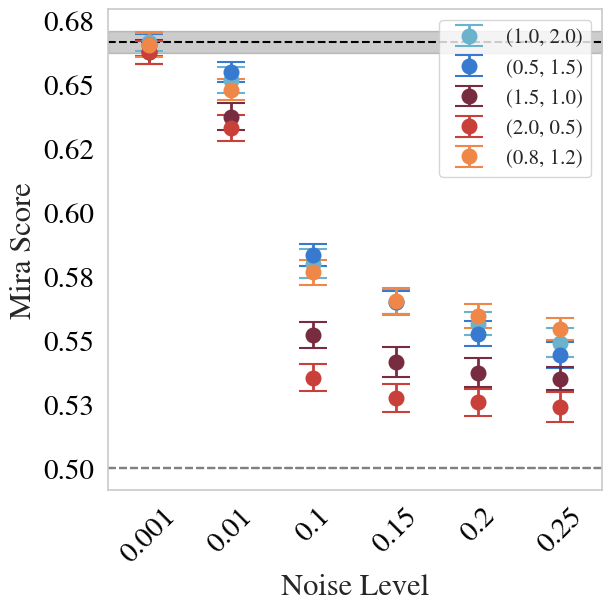

In [71]:
# Ellipse Mira Result
# Table Region_Choice (Ellipse Stretch Configurations)
noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]

# Scores and errors by ellipse stretch configuration
ellipse_configs = {
    "(1.0, 2.0)": (
        [0.6669, 0.6520, 0.5801, 0.5652, 0.5566, 0.5492],
        [0.0038, 0.0051, 0.0055, 0.0051, 0.0045, 0.0057]
    ),
    "(0.5, 1.5)": (
        [0.6656, 0.6550, 0.5834, 0.5650, 0.5527, 0.5442],
        [0.0044, 0.0040, 0.0044, 0.0045, 0.0049, 0.0051]
    ),
    "(1.5, 1.0)": (
        [0.6629, 0.6376, 0.5521, 0.5416, 0.5374, 0.5351],
        [0.0048, 0.0051, 0.0050, 0.0058, 0.0056, 0.0044]
    ),
    "(2.0, 0.5)": (
        [0.6627, 0.6332, 0.5354, 0.5276, 0.5258, 0.5239],
        [0.0044, 0.0051, 0.0053, 0.0055, 0.0054, 0.0058]
    ),
    "(0.8, 1.2)": (
        [0.6655, 0.6481, 0.5766, 0.5654, 0.5595, 0.5545],
        [0.0046, 0.0041, 0.0048, 0.0051, 0.0047, 0.0042]
    )
}

# Make one figure
fig, ax = plt.subplots(figsize=(6, 6))

# Call your function for each distribution
for i, (shape_size, (scores, errors)) in enumerate(ellipse_configs.items()):
    print(f"Plotting shape size: {shape_size} with scores: {scores} and errors: {errors}")
    plot_mira_alone(
        x=np.arange(len(noise_levels)),
        y=scores,
        yerr=errors,
        ax=ax,  # same axis each time
        colors_hex=[data_colors_hex[i % len(data_colors_hex)]],  # pick 1 color
        xtick_labels=[str(nl) for nl in noise_levels],
        xtick_rotation=45,
        xlabel="Noise Level",
        ylabel="Mira Score",
        table_number=f"Table_{i+1}",
        model_name=shape_size,  # Pass shape size for legend
        LR=False,
        draw_fill=(i == 0),
        lw=LW,
        L=3000,
        fontsize=FONTSIZE,
        alpha=ALPHA,
        markeredgewidth=MARKERDGEWIDTH,
        markersize=MARKERSIZE,
        elinewidth=ELINEWIDTH,
        capsize=CAPSIZE,
        decrease_size=DECREASE_SIZE
    )


fig.set_constrained_layout(True)
fig.savefig("../PDF_Plots/Shape_Size_Pokie_Result.pdf")
fig.savefig("../PNG_Plots/Shape_Size_Pokie_Result.png", dpi=300)
plt.show()

In [72]:
from torch import std


def plot_all_mira_experiments(
    dimensions, 
    hyperspheres, 
    posterior_samples,
    L,
    shifts=None,
    colors_hex=None,
    lw=5,
    legend_fontsize=8,
    well_calibrated_color=None,
    poorly_calibrated_color=None,
    underconfidence_color=None,
    save_path=None,
    fontsize=20,
    markersize=2,
    markeredgewidth=2,
    elinewidth=2,
    alpha=0.5,
    capsize=10,
    decrease_size=2,
):
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib as mpl
    from collections import OrderedDict

    x_label_font_size = fontsize
    y_label_font_size = fontsize
    tick_label_size = fontsize - decrease_size
    legend_font_size = fontsize - decrease_size

    if shifts is None:
        shifts = [-6, -3, 0, 3, 6]
    if colors_hex is None:
        # Fallback color set
        colors_hex = get_diverse_icefire_colors(10)[1]

    # fig, axs = plt.subplots(2, 2, figsize=(7, 7))
    # axs = axs.flatten()

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    # Helper to plot each group
    def plot_group(ax, data, title, xlabel):
        ax.grid(False)
        for i, (label, values) in enumerate(data.items()):
            ax.errorbar(
                shifts,
                values["scores"],
                yerr=values["errors"],
                fmt='o',
                capsize=capsize,
                color=colors_hex[i % len(colors_hex)],
                markersize=markersize,
                alpha=1.0,
                markeredgewidth=markeredgewidth,
                elinewidth=elinewidth,
                label=label,
            )
        ax.axhline(1/2, color='gray', linestyle='--', alpha = 1.0, lw=1.5, label='Poorly Calibrated')

        # ax.axhline((1/2 + 1/np.sqrt(12)), color='gray', linestyle='--', alpha = 1.0, lw=1.5, label='Underconfident')


        # Titles, labels, formatting
        ax.set_title(title, fontsize=25, fontweight='bold')
        ax.set_xlabel(xlabel, fontsize=x_label_font_size)
        # If ax is the leftmost, set y label
        if ax == axs[0]:
            ax.set_ylabel("Mira Score", fontsize=y_label_font_size)
        ax.tick_params(axis='x', labelsize=tick_label_size)
        ax.tick_params(axis='y', labelsize=tick_label_size)

        # Set x ticks to shifts
        ax.set_xticks(shifts)
        formatter = mpl.ticker.FormatStrFormatter('%.2f')
        ax.yaxis.set_major_formatter(formatter)
        # ax.set_ylim(0.48, 0.68)

        # Deduplicated legend
        handles, labels = ax.get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))
        if 'Well Calibrated' in by_label:
            by_label.pop('Well Calibrated')
        if 'Poorly Calibrated' in by_label:
            by_label.pop('Poorly Calibrated')
        if 'Underconfident' in by_label:
            by_label.pop('Underconfident')
        ax.legend(
            by_label.values(),
            by_label.keys(),
            fontsize=legend_fontsize,
            loc="upper right"
        )

        # Calibration lines
        variance = (1/18)/L
        std = np.sqrt(variance)
        ax.axhline(2/3, color='black', linestyle='--', alpha = 1.0, lw=1.5, label='Well Calibrated')
        support = np.linspace(-7, 7, 100)
        ax.fill_between(support, 2/3 - std, 2/3 + std, alpha=0.2, color='black')
        ax.set_xlim(-7, 7)

    # Apply to each subplot
    plot_group(axs[0], dimensions, "Varying Dimensions", "Shift Value")
    plot_group(axs[1], hyperspheres, "Varying Number of Regions", "Shift Value")
    plot_group(axs[2], posterior_samples, "Varying Posterior Samples", "Shift Value")
    # Decrease plot title size
    for ax in axs:
        ax.title.set_size(17)
    # axs[3].axis('off')

    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

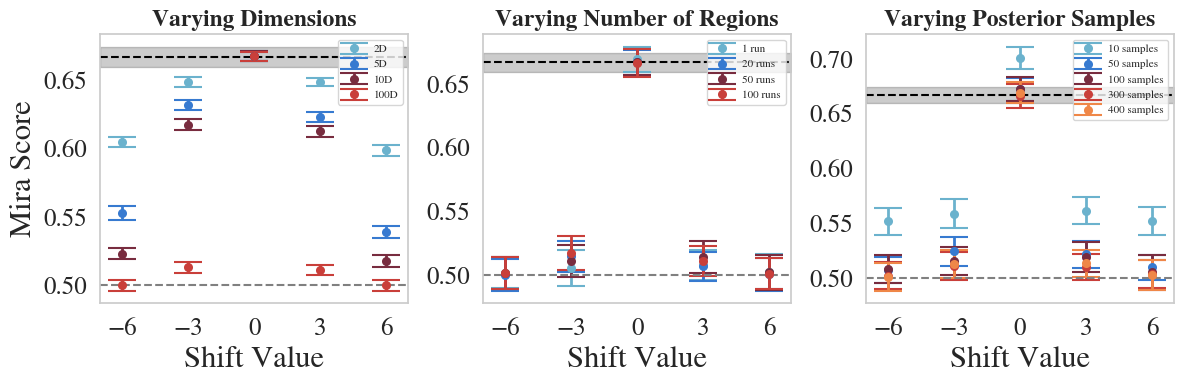

In [123]:
# Sensitivity Test (2 x 2 plot with lower right turned off) Top Left: Dimensions Test, Top Right: L, Bottom Left: Num of Samples

# dimensions = {
#     "2D": {
#         "scores": [0.57945573, 0.6326151, 0.66942304, 0.64173746, 0.59012246],
#         "errors": [0.01248384, 0.01088963, 0.01035882, 0.01032125, 0.01278516]
#     },
#     "5D": {
#         "scores": [0.5367861, 0.62651587, 0.669586, 0.6234588, 0.54084975],
#         "errors": [0.01230668, 0.01197242, 0.0098028, 0.0123906, 0.01318067]
#     },
#     "10D": {
#         "scores": [0.534148, 0.6322997, 0.6692669, 0.5984369, 0.51097333],
#         "errors": [0.01401818, 0.01112793, 0.010652, 0.01235012, 0.01194924]
#     },
#     "100D": {
#         "scores": [0.5027764, 0.5202979, 0.6674758, 0.50870305, 0.4999256],
#         "errors": [0.0113901, 0.01329869, 0.01020362, 0.01367662, 0.01269632]
#     }
# }


dimensions = {
    "2D": {
        "scores": [0.6045, 0.6483, 0.6669, 0.6481, 0.5984],
        "errors": [0.0038, 0.0033, 0.0031, 0.0030, 0.0040]
    },
    "5D": {
        "scores": [0.5526, 0.6315, 0.6671, 0.6228, 0.5389],
        "errors": [0.0050, 0.0037, 0.0035, 0.0039, 0.0045]
    },
    "10D": {
        "scores": [0.5233, 0.6171, 0.6670, 0.6124, 0.5176],
        "errors": [0.0041, 0.0040, 0.0037, 0.0039, 0.0044]
    },
    "100D": {
        "scores": [0.5000, 0.5132, 0.6669, 0.5113, 0.5002],
        "errors": [0.0042, 0.0042, 0.0034, 0.0038, 0.0040]
    }
}

hyperspheres = {
    "1 run": {
        "scores": [0.50174594, 0.5056617, 0.6693001, 0.50787807, 0.50258905],
        "errors": [0.01206928, 0.01407796, 0.00984546, 0.01173354, 0.01393633]
    },
    "20 runs": {
        "scores": [0.49978226, 0.51480174, 0.66691643, 0.5067856, 0.5003773],
        "errors": [0.01241044, 0.01214088, 0.00971929, 0.01128353, 0.01315701]
    },
    "50 runs": {
        "scores": [0.5013516, 0.5108235, 0.66729254, 0.5139341, 0.5020315],
        "errors": [0.01271933, 0.01252874, 0.01006315, 0.01246938, 0.01378876]
    },
    "100 runs": {
        "scores": [0.5016635, 0.51724625, 0.666212, 0.51095235, 0.50109875],
        "errors": [0.01265017, 0.01357112, 0.011236, 0.01181128, 0.01200862]
    }
}

posterior_samples = {
    "10 samples": {
        "scores": [0.551524, 0.558326, 0.700476, 0.561078, 0.551656],
        "errors": [0.01227844, 0.01295106, 0.01041854, 0.01242701, 0.01262283]
    },
    "50 samples": {
        "scores": [0.5068244, 0.52390444, 0.6718412, 0.521318, 0.50925756],
        "errors": [0.01214749, 0.01329519, 0.01028553, 0.01222892, 0.01169688]
    },
    "100 samples": {
        "scores": [0.5075212, 0.5151786, 0.6719145, 0.51890856, 0.504944],
        "errors": [0.01285653, 0.01281209, 0.01091054, 0.01374135, 0.0159563]
    },
    # "200 samples": {
    #     "scores": [0.5036858, 0.51340437, 0.6679275, 0.5200728, 0.5014128],
    #     "errors": [0.01274271, 0.00955724, 0.01060478, 0.013953, 0.01276546]
    # },
    "300 samples": {
        "scores": [0.5016408, 0.5107455, 0.6657693, 0.50997925, 0.5033823],
        "errors": [0.01237438, 0.01296766, 0.01058149, 0.01192634, 0.0130619]
    },
    "400 samples": {
        "scores": [0.50039786, 0.5123267, 0.6688564, 0.5128226, 0.5022506],
        "errors": [0.01289913, 0.01267484, 0.00940202, 0.01235659, 0.01377634]
    },
    # "500 samples": {
    #     "scores": [0.5017785, 0.5091051, 0.66844094, 0.5131277, 0.49969608],
    #     "errors": [0.01258485, 0.01200053, 0.01023337, 0.01384445, 0.01199949]
    # }
}

'''
Colors
Legend
Size of Markers

'''
FONTSIZE = 22
LW = 1.5
ALPHA = 0.9
MARKERDGEWIDTH = 1.5
MARKERSIZE = 5
ELINEWIDTH = 2
CAPSIZE = 10
DECREASE_SIZE = 4

model_shifts = [-6, -3, 0, 3, 6]

plot_all_mira_experiments(
    dimensions=dimensions,
    hyperspheres=hyperspheres,
    posterior_samples=posterior_samples,
    colors_hex=data_colors_hex, 
    lw=LW,
    L=1000,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth=ELINEWIDTH,
    capsize=CAPSIZE,
    decrease_size=DECREASE_SIZE,
    save_path="../PDF_Plots/Sensitivity_All_Experiments.pdf"
)


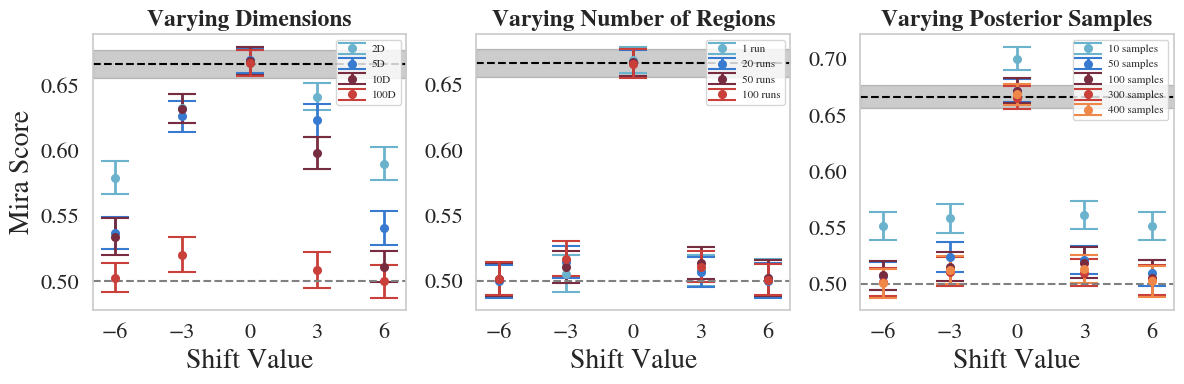

In [74]:
# Sensitivity Test (2 x 2 plot with lower right turned off) Top Left: Dimensions Test, Top Right: L, Bottom Left: Num of Samples

dimensions = {
    "2D": {
        "scores": [0.57945573, 0.6326151, 0.66942304, 0.64173746, 0.59012246],
        "errors": [0.01248384, 0.01088963, 0.01035882, 0.01032125, 0.01278516]
    },
    "5D": {
        "scores": [0.5367861, 0.62651587, 0.669586, 0.6234588, 0.54084975],
        "errors": [0.01230668, 0.01197242, 0.0098028, 0.0123906, 0.01318067]
    },
    "10D": {
        "scores": [0.534148, 0.6322997, 0.6692669, 0.5984369, 0.51097333],
        "errors": [0.01401818, 0.01112793, 0.010652, 0.01235012, 0.01194924]
    },
    "100D": {
        "scores": [0.5027764, 0.5202979, 0.6674758, 0.50870305, 0.4999256],
        "errors": [0.0113901, 0.01329869, 0.01020362, 0.01367662, 0.01269632]
    }
}


# dimensions = {
#     "2D": {
#         "scores": [0.6045, 0.6483, 0.6669, 0.6481, 0.5984],
#         "errors": [0.0038, 0.0033, 0.0031, 0.0030, 0.0040]
#     },
#     "5D": {
#         "scores": [0.5526, 0.6315, 0.6671, 0.6228, 0.5389],
#         "errors": [0.0050, 0.0037, 0.0035, 0.0039, 0.0045]
#     },
#     "10D": {
#         "scores": [0.5233, 0.6171, 0.6670, 0.6124, 0.5176],
#         "errors": [0.0041, 0.0040, 0.0037, 0.0039, 0.0044]
#     },
#     "100D": {
#         "scores": [0.5000, 0.5132, 0.6669, 0.5113, 0.5002],
#         "errors": [0.0042, 0.0042, 0.0034, 0.0038, 0.0040]
#     }
# }

hyperspheres = {
    "1 run": {
        "scores": [0.50174594, 0.5056617, 0.6693001, 0.50787807, 0.50258905],
        "errors": [0.01206928, 0.01407796, 0.00984546, 0.01173354, 0.01393633]
    },
    "20 runs": {
        "scores": [0.49978226, 0.51480174, 0.66691643, 0.5067856, 0.5003773],
        "errors": [0.01241044, 0.01214088, 0.00971929, 0.01128353, 0.01315701]
    },
    "50 runs": {
        "scores": [0.5013516, 0.5108235, 0.66729254, 0.5139341, 0.5020315],
        "errors": [0.01271933, 0.01252874, 0.01006315, 0.01246938, 0.01378876]
    },
    "100 runs": {
        "scores": [0.5016635, 0.51724625, 0.666212, 0.51095235, 0.50109875],
        "errors": [0.01265017, 0.01357112, 0.011236, 0.01181128, 0.01200862]
    }
}

posterior_samples = {
    "10 samples": {
        "scores": [0.551524, 0.558326, 0.700476, 0.561078, 0.551656],
        "errors": [0.01227844, 0.01295106, 0.01041854, 0.01242701, 0.01262283]
    },
    "50 samples": {
        "scores": [0.5068244, 0.52390444, 0.6718412, 0.521318, 0.50925756],
        "errors": [0.01214749, 0.01329519, 0.01028553, 0.01222892, 0.01169688]
    },
    "100 samples": {
        "scores": [0.5075212, 0.5151786, 0.6719145, 0.51890856, 0.504944],
        "errors": [0.01285653, 0.01281209, 0.01091054, 0.01374135, 0.0159563]
    },
    # "200 samples": {
    #     "scores": [0.5036858, 0.51340437, 0.6679275, 0.5200728, 0.5014128],
    #     "errors": [0.01274271, 0.00955724, 0.01060478, 0.013953, 0.01276546]
    # },
    "300 samples": {
        "scores": [0.5016408, 0.5107455, 0.6657693, 0.50997925, 0.5033823],
        "errors": [0.01237438, 0.01296766, 0.01058149, 0.01192634, 0.0130619]
    },
    "400 samples": {
        "scores": [0.50039786, 0.5123267, 0.6688564, 0.5128226, 0.5022506],
        "errors": [0.01289913, 0.01267484, 0.00940202, 0.01235659, 0.01377634]
    },
    # "500 samples": {
    #     "scores": [0.5017785, 0.5091051, 0.66844094, 0.5131277, 0.49969608],
    #     "errors": [0.01258485, 0.01200053, 0.01023337, 0.01384445, 0.01199949]
    # }
}

'''
Colors
Legend
Size of Markers

'''
FONTSIZE = 20
LW = 1.5
ALPHA = 0.9
MARKERDGEWIDTH = 1.5
MARKERSIZE = 5
ELINEWIDTH = 2
CAPSIZE = 10
DECREASE_SIZE = 4

model_shifts = [-6, -3, 0, 3, 6]

plot_all_mira_experiments(
    dimensions=dimensions,
    hyperspheres=hyperspheres,
    posterior_samples=posterior_samples,
    colors_hex=data_colors_hex, 
    lw=LW,
    L=500,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth=ELINEWIDTH,
    capsize=CAPSIZE,
    decrease_size=DECREASE_SIZE,
    save_path="../PDF_Plots/Sensitivity_All_Experiments.pdf"
)


In [75]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mira_curve(
    ax,
    epochs,
    scores,
    *,
    label,
    color,
    L=1000,
    lw=1.5,
    alpha=0.9,
    markersize=6,
    markeredgewidth=1.5,
    eline_alpha=0.15,
    fontsize=15,
    show_reference=True,
):
    """
    Plot a single MIRA curve with error band and calibration references.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Axis to plot on
    epochs : 1D np.ndarray
        Epoch numbers
    scores : 1D np.ndarray
        Average MIRA scores
    label : str
        Label for legend
    color : str
        Line/marker color
    L : int
        Number of fiducials (controls error size)
    """

    # --- Error model (your theoretical bound)
    std = np.sqrt((1 / 18) / L)

    # --- Main curve
    ax.plot(
        epochs,
        scores,
        marker='o',
        lw=lw,
        color=color,
        alpha=alpha,
        markersize=markersize,
        markeredgewidth=markeredgewidth,
        label=label,
    )

    # --- Error band
    ax.fill_between(
        epochs,
        scores - std,
        scores + std,
        color=color,
        alpha=eline_alpha,
        linewidth=0,
    )

    # --- Reference calibration lines
    if show_reference:
        ax.axhline(0.5, color='gray', linestyle='--', lw=lw, alpha = 1.0)
        ax.axhline(2/3, color='black', linestyle='--', lw=lw, alpha = 1.0)
        # ax.axhline(0.5 + 1/np.sqrt(12), color='gray', linestyle='--', lw=lw)
        variance = (1/18)/1000
        std = np.sqrt(variance)
        support = epochs
        ax.fill_between(support, 2/3 - std, 2/3 + std, alpha=0.2, color='black')

    # --- Axis formatting
    ax.set_xlim(epochs[0] - 0.5, epochs[-1] + 0.5)
    ax.set_ylabel("MIRA Score", fontsize=fontsize)
    ax.tick_params(axis='both', labelsize=fontsize - 2)

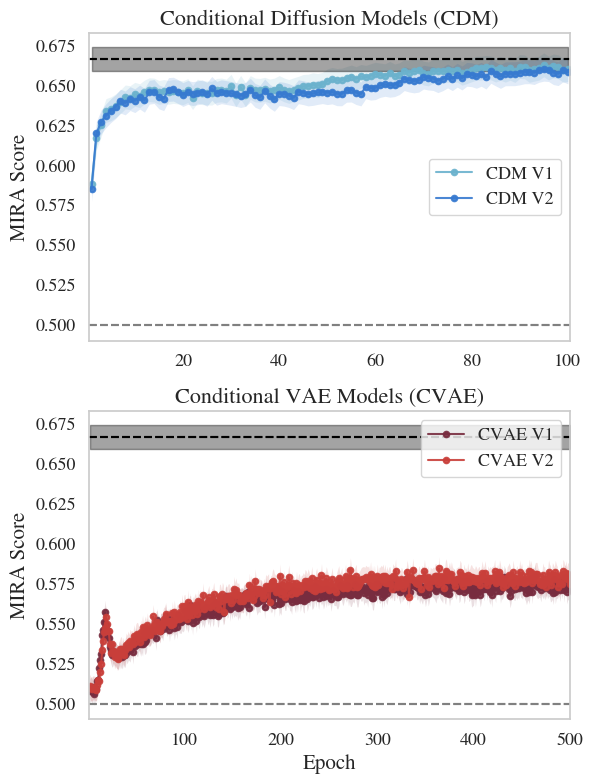

In [76]:
import numpy as np
import matplotlib.pyplot as plt

cache = np.load("/Users/sammysharief/Downloads/ICLR_2026_Plots/Conditional_Gen_Model_Data/mira_cache.npz")

cdm_models = ["CDM V1", "CDM V2"]
cvae_models = ["CVAE V1", "CVAE V2"]

fig, (ax_cdm, ax_cvae) = plt.subplots(
    2, 1, figsize=(6, 8), sharey=True
)

# --- CDM (top)
for model, color in zip(cdm_models, data_colors_hex[:2]):
    plot_mira_curve(
        markersize = 4,
        ax=ax_cdm,
        epochs=cache[f"{model}_epochs"],
        scores=cache[f"{model}_scores"],
        label=model,
        color=color
    )

ax_cdm.set_title("Conditional Diffusion Models (CDM)", fontsize=16)
ax_cdm.legend(fontsize=13)
ax_cdm.grid(False)

# --- CVAE (bottom)
for model, color in zip(cvae_models, data_colors_hex[2:4]):
    plot_mira_curve(
        markersize = 4,
        ax=ax_cvae,
        epochs=cache[f"{model}_epochs"],
        scores=cache[f"{model}_scores"],
        label=model,
        color=color
    )

ax_cvae.set_title("Conditional VAE Models (CVAE)", fontsize=16)
ax_cvae.set_xlabel("Epoch", fontsize=15)
ax_cvae.legend(fontsize=13)
ax_cvae.grid(False)

plt.tight_layout()
plt.savefig("../PDF_Plots/CDM_vs_CVAE_Mira.pdf")
plt.savefig("../PNG_Plots/CDM_vs_CVAE_Mira.png", dpi=300)
plt.grid(False)
plt.show()

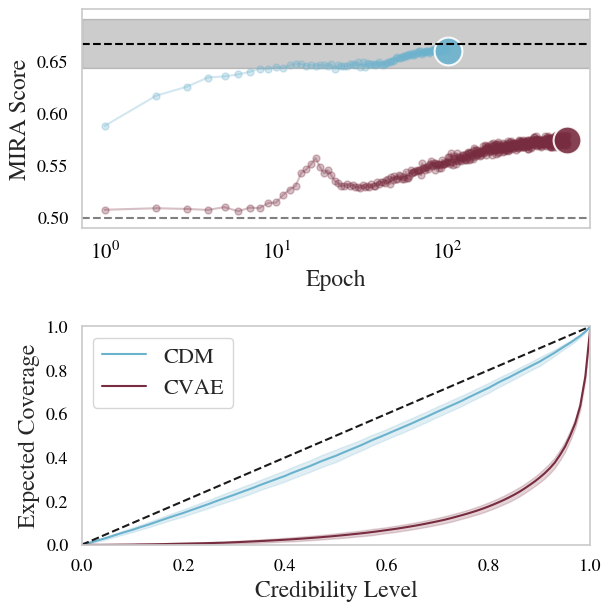

In [122]:
def plot_mira_training_curves(
    ax,
    cache,
    models,
    colors_hex,
    L=100,
    ylabel='MIRA Score',
    xlabel='Epoch',
    title=None,
    lw=1.5,
    fontsize=20,
    markersize_trail=3,
    markersize_final=10,
    markeredgewidth=1.5,
    alpha_trail=0.3,
    alpha_final=1.0,
    decrease_size=2,
    well_calibrated_line=True,
    poorly_calibrated_line=True,
):
    """
    Plot MIRA score as a function of training epoch with faded training history
    and bold final points to emphasize final results.
    
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes to plot on
    cache : dict-like
        Data cache containing '{model}_epochs' and '{model}_scores' arrays
    models : list of str
        Model names to plot (e.g., ["CDM V1", "CVAE V1"])
    colors_hex : list of str
        Colors for each model
    L : int
        Number of samples (for computing well-calibrated uncertainty band)
    ylabel : str
        Y-axis label
    xlabel : str
        X-axis label
    title : str, optional
        Plot title
    lw : float
        Line width for training curves
    fontsize : int
        Base font size
    markersize_trail : float
        Marker size for faded training history
    markersize_final : float
        Marker size for final (bold) points
    markeredgewidth : float
        Edge width for final markers
    alpha_trail : float
        Opacity for training history (faded)
    alpha_final : float
        Opacity for final points (bold)
    decrease_size : int
        Amount to decrease font size for ticks/legend
    well_calibrated_line : bool
        Whether to show the well-calibrated reference line at 2/3
    poorly_calibrated_line : bool
        Whether to show the poorly-calibrated reference line at 1/2
    """
    
    tick_label_size = fontsize - decrease_size
    legend_font_size = fontsize - decrease_size
    
    ax.grid(False)
    
    # Track x-range for fill_between
    all_epochs = []
    
    for model, color in zip(models, colors_hex):
        epochs = cache[f"{model}_epochs"]
        scores = cache[f"{model}_scores"]
        all_epochs.extend(epochs)
        
        # Plot the training trajectory (faded)
        ax.plot(
            epochs[:-1], scores[:-1],
            color=color,
            alpha=alpha_trail,
            marker='o',
            markersize=markersize_trail,
            linewidth=lw
        )
        
        # Connect last faded point to final point (faded line)
        ax.plot(
            epochs[-2:], scores[-2:],
            color=color,
            alpha=alpha_trail,
            linewidth=lw
        )
        
        # Plot the final point (bold) with label
        ax.plot(
            epochs[-1], scores[-1],
            color=color,
            alpha=alpha_final,
            marker='o',
            markersize=markersize_final,
            markeredgecolor='white',
            markeredgewidth=markeredgewidth,
            label=f"{model[:-3]}", # the model name minus the last 3 characters
            linestyle='None'
        )
        
    # Reference lines
    x_min, x_max = min(all_epochs), max(all_epochs)
    
    if poorly_calibrated_line:
        ax.axhline(1/2, color='gray', linestyle='--', alpha=1.0, lw=lw)
    
    if well_calibrated_line:
        ax.axhline(2/3, color='black', linestyle='--', alpha=1.0, lw=lw)
        # Uncertainty band
        variance = (1/18) / L
        std = np.sqrt(variance)
        
        # axhspan automatically spans the full x-axis, regardless of scale
        ax.axhspan(2/3 - std, 2/3 + std, alpha=0.2, color='black')
    
    # Formatting
    if title:
        ax.set_title(title, fontsize=fontsize, fontweight='bold')
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.tick_params(axis='x', labelsize=15, colors='black')
    ax.tick_params(axis='y', labelsize=tick_label_size, colors='black')
    
    # Format y-axis to two decimal places
    formatter = mpl.ticker.FormatStrFormatter('%.2f')
    ax.yaxis.set_major_formatter(formatter)
    
    # ax.legend(fontsize=legend_font_size, loc='upper left')
    # Log the x axis
    ax.set_xscale('log')
    return ax

models = ["Conditional\nDiffusion Model", "Conditional\nVAE"]

scores = [0.6599, 0.5748]
errors = [0.0248, 0.0276]

L =100

cache = np.load("/Users/sammysharief/Downloads/ICLR_2026_Plots/Conditional_Gen_Model_Data/mira_cache.npz")

# One model from each family
models_to_plot = ["CDM V1", "CVAE V1"]

L = 100
fig, (ax_top, ax_bottom) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(6, 6),
    gridspec_kw={'hspace': 0.1}
)

FONTSIZE = 17
LW = 1.5
ALPHA = 0.9
MARKERDGEWIDTH = 1.5
MARKERSIZE = 10
ELINEWIDTH = 2
CAPSIZE = 10
DECREASE_SIZE = 4

# Top panel: MIRA training curves
plot_mira_training_curves(
    ax=ax_top,
    cache=cache,
    models=models_to_plot,
    colors_hex=[data_colors_hex[0], data_colors_hex[2]],  # CDM color, CVAE color
    L=L,
    ylabel='MIRA Score',
    xlabel='Epoch',
    lw=LW,
    fontsize=FONTSIZE,
    markersize_trail=5,
    markersize_final=MARKERSIZE+10,
    markeredgewidth=MARKERDGEWIDTH,
    alpha_trail=0.3,
    alpha_final=ALPHA,
    decrease_size=DECREASE_SIZE,
)

plot_validation_result(
    ax=ax_bottom, 
    conditional_distribution=True, 
    data_colors_hex=[data_colors_hex[0], data_colors_hex[2]],
    lw=LW,
    fontsize=FONTSIZE,
    alpha=ALPHA,
    markeredgewidth=MARKERDGEWIDTH,
    markersize=MARKERSIZE,
    elinewidth = ELINEWIDTH,
    legend_font_size=(FONTSIZE+5) - DECREASE_SIZE,
    capsize=CAPSIZE,
    decrease_size=DECREASE_SIZE )



fig.set_constrained_layout(True)
fig.savefig('../PDF_Plots/MIRA_CModel_PLot.pdf')
fig.savefig('../PNG_Plots/MIRA_CModel_PLot.png', dpi=300)